In [68]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [114]:
df=pd.read_csv('../artifacts/data_ingestion/data.csv')
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   vendorid               500000 non-null  int64  
 1   tpep_pickup_datetime   500000 non-null  str    
 2   tpep_dropoff_datetime  500000 non-null  str    
 3   passenger_count        500000 non-null  float64
 4   trip_distance          500000 non-null  float64
 5   ratecodeid             500000 non-null  float64
 6   store_and_fwd_flag     500000 non-null  str    
 7   pulocationid           500000 non-null  int64  
 8   dolocationid           500000 non-null  int64  
 9   payment_type           500000 non-null  int64  
 10  fare_amount            500000 non-null  float64
 11  extra                  500000 non-null  float64
 12  mta_tax                500000 non-null  float64
 13  tip_amount             500000 non-null  float64
 14  tolls_amount           500000 non-null  float64

In [115]:
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01T00:32:10.000,2023-01-01T00:40:36.000,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01T00:55:08.000,2023-01-01T01:01:27.000,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01T00:25:04.000,2023-01-01T00:37:49.000,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01T00:03:48.000,2023-01-01T00:13:25.000,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01T00:10:29.000,2023-01-01T00:21:19.000,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [116]:
df.isna().sum()

vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

In [ ]:
# adding pre tipa amount
df['pre_tip_amount'] = (
    df['fare_amount'] + 
    df['extra'] + 
    df['mta_tax'] + 
    df['tolls_amount'] + 
    df['improvement_surcharge'] + 
    df['congestion_surcharge'] + 
    df['airport_fee']
)

In [118]:
df['pre_tip_amount'].value_counts()

pre_tip_amount
 14.00     10316
 13.30     10112
 12.60      9814
 14.70      9661
 15.40      9436
           ...  
 31.06         1
-36.30         1
 160.85        1
-9.40          1
 37.95         1
Name: count, Length: 4377, dtype: int64

In [119]:
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pre_tip_amount
0,2,2023-01-01T00:32:10.000,2023-01-01T00:40:36.000,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,14.3
1,2,2023-01-01T00:55:08.000,2023-01-01T01:01:27.000,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,12.9
2,2,2023-01-01T00:25:04.000,2023-01-01T00:37:49.000,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,19.9
3,1,2023-01-01T00:03:48.000,2023-01-01T00:13:25.000,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,22.1
4,2,2023-01-01T00:10:29.000,2023-01-01T00:21:19.000,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,16.4


 #### **Data Cleaning**   

###  **Filling Missing values**

In [ ]:
# df['passenger_count']=df['passenger_count'].fillna(1)  #after finding mean of this columns we got 1.37 value ,after rounding we're assuming it as 1
# df['congestion_surcharge']=df['congestion_surcharge'].fillna(0)
# df['airport_fee']=df['airport_fee'].fillna(0)
# df['RatecodeID']=df['RatecodeID'].fillna(99) #after investigating thsi column ,we replacing with 9.9(Null/unknown)
# df=df.drop(columns='store_and_fwd_flag') #we're droppoing this columns ,(N:99%+) value.so i could not impact on out predictive model

0 NUll value 

**Is_Airport_Trip: Create a binary flag (1 if PULocationID or DOLocationID is an airport zone, else 0). Tipping on airport trips follows different patterns than standard city hops.**

In [121]:
aritport_zones=[1,132,138,139] #airport zones

df['Is_Airport_Trip']=(
    df['pulocationid'].isin(aritport_zones) | df['dolocationid'].isin(aritport_zones).astype(int)
)

###   **Preprocessing Data time**

In [122]:
import pandas as pd

# 1. Convert to datetime using the correct format for your data
# Using format='ISO8601' handles the "2023-01-01T00:32:10" format automatically
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='ISO8601')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='ISO8601')

# 2. Extract Month and Day of Week
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['dropoff_month'] = df['tpep_dropoff_datetime'].dt.month

df['pickup_dow'] = df['tpep_pickup_datetime'].dt.dayofweek
df['dropoff_dow'] = df['tpep_dropoff_datetime'].dt.dayofweek

# 3. Weekend Flag (1 for Sat/Sun, 0 otherwise)
df['is_weekend'] = df['pickup_dow'].isin([5, 6]).astype(int)

# 4. Extract Hour (Faster to get as int directly)
df['pickup_hr'] = df['tpep_pickup_datetime'].dt.hour
df['dropoff_hr'] = df['tpep_dropoff_datetime'].dt.hour

# 5. AM/PM Indicator (PM = 1, AM = 0)
# We can do this based on the hour (>= 12) which is much faster than string parsing
df['pickup_ampm'] = (df['pickup_hr'] >= 12).astype(int)
df['dropoff_ampm'] = (df['dropoff_hr'] >= 12).astype(int)

# 6. Trip duration in minutes
df['trip_duration_mins'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


In [123]:
# df=df[df['trip_duration_mins']<0]
df=df[(df['trip_duration_mins']>0) & (df['trip_duration_mins']<120)]

###  Create time slot according to hours 
suchas:Rush hour,most peak Tip,morning,evening , speed

In [124]:
df['is_weekend'].value_counts()

is_weekend
0    425972
1     73131
Name: count, dtype: int64

In [125]:
df.info()

<class 'pandas.DataFrame'>
Index: 499103 entries, 0 to 499999
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   vendorid               499103 non-null  int64         
 1   tpep_pickup_datetime   499103 non-null  datetime64[us]
 2   tpep_dropoff_datetime  499103 non-null  datetime64[us]
 3   passenger_count        499103 non-null  float64       
 4   trip_distance          499103 non-null  float64       
 5   ratecodeid             499103 non-null  float64       
 6   store_and_fwd_flag     499103 non-null  str           
 7   pulocationid           499103 non-null  int64         
 8   dolocationid           499103 non-null  int64         
 9   payment_type           499103 non-null  int64         
 10  fare_amount            499103 non-null  float64       
 11  extra                  499103 non-null  float64       
 12  mta_tax                499103 non-null  float64       
 13  

In [126]:
df['pickup_dow'].value_counts()

pickup_dow
3    98659
2    92820
4    86442
1    83625
6    73105
0    64426
5       26
Name: count, dtype: int64

In [127]:
# average peak hour for most tip amount 
# peak window(4AM-6AM)
df['is_airport_peak_hour']=df['pickup_hr'].apply(
    lambda hr:1 if 4<=hr<=6 else 0
)
# evening peak hour
df['is_pm_peak_hour']=df['pickup_hr'].apply(
    lambda hr:1 if 16<=hr<=18 else 0
)

In [128]:
# calculating avg speed of trip     [avg_speed = trip_distance / trip_duration_mins]
df['avg_speed']=df['trip_distance']/df['trip_duration_mins']
df['avg_speed'].value_counts()

avg_speed
0.000000    6716
0.150000     741
0.171429     520
0.200000     476
0.133333     440
            ... 
0.593729       1
0.106535       1
0.217378       1
0.225755       1
0.173348       1
Name: count, Length: 204620, dtype: int64

In [129]:
df['is_pm_peak_hour'].value_counts()

is_pm_peak_hour
0    393260
1    105843
Name: count, dtype: int64

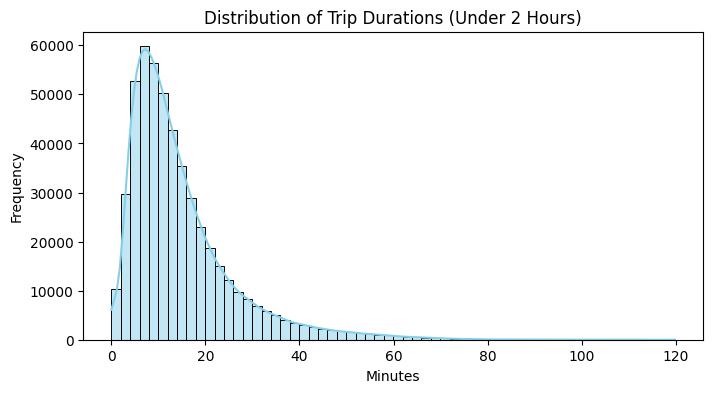

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.histplot(df['trip_duration_mins'], bins=60, kde=True, color='skyblue')
plt.title('Distribution of Trip Durations (Under 2 Hours)')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

In [131]:
df=df.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime'])

In [132]:
df.info()

<class 'pandas.DataFrame'>
Index: 499103 entries, 0 to 499999
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   vendorid               499103 non-null  int64  
 1   passenger_count        499103 non-null  float64
 2   trip_distance          499103 non-null  float64
 3   ratecodeid             499103 non-null  float64
 4   store_and_fwd_flag     499103 non-null  str    
 5   pulocationid           499103 non-null  int64  
 6   dolocationid           499103 non-null  int64  
 7   payment_type           499103 non-null  int64  
 8   fare_amount            499103 non-null  float64
 9   extra                  499103 non-null  float64
 10  mta_tax                499103 non-null  float64
 11  tip_amount             499103 non-null  float64
 12  tolls_amount           499103 non-null  float64
 13  improvement_surcharge  499103 non-null  float64
 14  total_amount           499103 non-null  float64
 15 

In [133]:
# df.agg(['min','max','mean']).T

###  **Data CLeaning for specific feature**

In [ ]:
df=df[df['trip_distance']>0] # because there is no less than 0 trip distance
df=df[df['trip_distance']<100]# because there is no such max miles,we simply gave it max 100

df=df[~df.select_dtypes(include="number").lt(0).any(axis=1)] #it will remove those values  which is less than 0, .lt(0):means less than 0 vlaues

In [ ]:
df=df[df["total_amount"]>3.7]
df=df[df["total_amount"]<1000]

In [136]:
df=df[df['payment_type']==1]

In [137]:
len(df)

380616

In [138]:
df=df.drop(columns=['payment_type','dropoff_month','dropoff_dow','dropoff_ampm','dropoff_hr'])

In [139]:
df.head()

,vendorid,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pre_tip_amount,Is_Airport_Trip,pickup_month,pickup_dow,is_weekend,pickup_hr,pickup_ampm,trip_duration_mins,is_airport_peak_hour,is_pm_peak_hour,avg_speed
1,2,1.0,1.10,1.0,N,43,237,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,12.9,False,1,6,1,0,0,6.316667,0,0,0.174142
2,2,1.0,2.51,1.0,N,48,238,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,19.9,False,1,6,1,0,0,12.750000,0,0,0.196863
3,1,0.0,1.90,1.0,N,138,7,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,22.1,True,1,6,1,0,0,9.616667,0,0,0.197574
4,2,1.0,1.43,1.0,N,107,79,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,16.4,False,1,6,1,0,0,10.833333,0,0,0.132000
5,2,1.0,1.84,1.0,N,161,137,12.8,1.00,0.5,10.00,0.0,1.0,27.80,2.5,0.00,17.8,False,1,6,1,0,0,12.300000,0,0,0.149593


In [140]:
# removing 99 cause invalid code
df=df[df['ratecodeid']<99]
df=df[df['fare_amount']>=3]
df=df[df['trip_distance']>0.01]

In [141]:
len(df)

378386

In [142]:
df=df[df['passenger_count']>0]
df=df[df['passenger_count']<=6]

In [143]:
df=df.drop(columns=['mta_tax','improvement_surcharge','pickup_month'])

In [144]:
# print(len(x_train), len(x_test))

In [145]:
df.head()

,vendorid,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee,pre_tip_amount,Is_Airport_Trip,pickup_dow,is_weekend,pickup_hr,pickup_ampm,trip_duration_mins,is_airport_peak_hour,is_pm_peak_hour,avg_speed
1,2,1.0,1.10,1.0,N,43,237,7.9,1.0,4.00,0.0,16.90,2.5,0.0,12.9,False,6,1,0,0,6.316667,0,0,0.174142
2,2,1.0,2.51,1.0,N,48,238,14.9,1.0,15.00,0.0,34.90,2.5,0.0,19.9,False,6,1,0,0,12.750000,0,0,0.196863
4,2,1.0,1.43,1.0,N,107,79,11.4,1.0,3.28,0.0,19.68,2.5,0.0,16.4,False,6,1,0,0,10.833333,0,0,0.132000
5,2,1.0,1.84,1.0,N,161,137,12.8,1.0,10.00,0.0,27.80,2.5,0.0,17.8,False,6,1,0,0,12.300000,0,0,0.149593
6,2,1.0,1.66,1.0,N,239,143,12.1,1.0,3.42,0.0,20.52,2.5,0.0,17.1,False,6,1,0,0,10.450000,0,0,0.158852


Fare per mile

In [146]:
df['farePerMile']=df['fare_amount']/df['trip_distance']

In [147]:
# Encoding cynical for pickuphr
import numpy as np

# 1. Create Sine and Cosine features
df['hr_sin'] = np.sin(2 * np.pi * df['pickup_hr'] / 24.0)
df['hr_cos'] = np.cos(2 * np.pi * df['pickup_hr'] / 24.0)



# 3. Drop the original linear hour column
df.drop(columns=['pickup_hr'], inplace=True)


#### **Tip_amount:**  is going to greater than 0, It litterally ***increased 8% R2 & reduce RMSE***

In [148]:
df=df[df['tip_amount']>0]

In [149]:
df.shape

(357345, 26)

###   **Splitting:trian-test-split**

In [150]:
# 20% for spliting
(len(df)*20)/100  

71469.0

In [151]:
len(df)

357345

In [152]:
df.head()

,vendorid,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee,pre_tip_amount,Is_Airport_Trip,pickup_dow,is_weekend,pickup_ampm,trip_duration_mins,is_airport_peak_hour,is_pm_peak_hour,avg_speed,farePerMile,hr_sin,hr_cos
1,2,1.0,1.10,1.0,N,43,237,7.9,1.0,4.00,0.0,16.90,2.5,0.0,12.9,False,6,1,0,6.316667,0,0,0.174142,7.181818,0.0,1.0
2,2,1.0,2.51,1.0,N,48,238,14.9,1.0,15.00,0.0,34.90,2.5,0.0,19.9,False,6,1,0,12.750000,0,0,0.196863,5.936255,0.0,1.0
4,2,1.0,1.43,1.0,N,107,79,11.4,1.0,3.28,0.0,19.68,2.5,0.0,16.4,False,6,1,0,10.833333,0,0,0.132000,7.972028,0.0,1.0
5,2,1.0,1.84,1.0,N,161,137,12.8,1.0,10.00,0.0,27.80,2.5,0.0,17.8,False,6,1,0,12.300000,0,0,0.149593,6.956522,0.0,1.0
6,2,1.0,1.66,1.0,N,239,143,12.1,1.0,3.42,0.0,20.52,2.5,0.0,17.1,False,6,1,0,10.450000,0,0,0.158852,7.289157,0.0,1.0


In [153]:
# df['tip_ratio']=df['tip_amount']/df['total_amount'] #not doing ,it can cause dta leakage


In [154]:
# df['tip_ratio'].agg(['min','max','mean'])

In [155]:
# df[df['tip_ratio']>0.974212].head().sort_values(by='tip_ratio',ascending=False)

In [156]:
# df['tip_amount'].agg(['min','max','mean'])

# #basic train -test split

In [164]:
# for random forest split
# Function for SPlitting our dataset ------> 80:20
def train_test_split(df):
  # shuffling our data
  df=df.sample(frac=1,random_state=432).reset_index(drop=True)

  # selecting trining & target columns
  target=df['tip_amount']
  features=df.drop(columns=['tip_amount'])

  # reserve all but the last 1000000 rows for training - anything else for testing
  x_train,x_test=features.iloc[:-71469],features.iloc[-71469:]
  y_train,y_test=target.iloc[:-71469],target.iloc[-71469:]


  return x_train,x_test,y_train,y_test


x_train,x_test,y_train,y_test=train_test_split(df)

In [165]:
len(y_train)

285876

In [166]:
len(y_test)

71469

In [167]:
len(df)*0.2

71469.0

In [168]:
y_train.value_counts().sort_index(ascending=False).head()

tip_amount
130.00    1
109.00    1
104.00    1
95.00     1
91.25     1
Name: count, dtype: int64

## 99Percentile outliers on TRAINING features
Doing after splitting Cause avoidinig Data Leakage

In [46]:
# Calculate the 99th percentile for Fare and Trip Distance
# We focus on these because they drive the Tip Amount
fare_cap = x_train['fare_amount'].quantile(0.995)
dist_cap = x_train['trip_distance'].quantile(0.995)


 
x_train['fare_amount']=x_train['fare_amount'].clip(upper=fare_cap)
x_train['trip_distance']=x_train['trip_distance'].clip(upper=dist_cap)

x_test['fare_amount']=x_test['fare_amount'].clip(upper=fare_cap)
x_test['trip_distance']=x_test['trip_distance'].clip(upper=dist_cap)

print("---------Training--------")
print(f"Capped {(x_train['fare_amount'] >= fare_cap).sum()} training samples")
print(f"Capped {(x_train['trip_distance'] >= dist_cap).sum()} testing samples")
print("---------Testing--------")
print(f"Capped {(x_test['fare_amount'] >= fare_cap).sum()} training samples")
print(f"Capped {(x_test['trip_distance'] >= dist_cap).sum()} testing samples")

---------Training--------
Capped 14588 training samples
Capped 14615 testing samples
---------Testing--------
Capped 3614 training samples
Capped 3663 testing samples


In [169]:
x_train[['fare_amount','trip_distance']].value_counts().sort_index(ascending=False).head(10)

fare_amount  trip_distance
346.00       57.98            1
342.00       53.02            1
338.88       42.01            1
336.90       58.29            1
336.66       69.60            1
335.50       54.02            1
329.90       50.48            1
325.00       21.92            1
311.70       54.12            1
297.00       42.50            1
Name: count, dtype: int64

In [170]:
x_train[['fare_amount','trip_distance']].value_counts().sort_index(ascending=False).head(10)

fare_amount  trip_distance
346.00       57.98            1
342.00       53.02            1
338.88       42.01            1
336.90       58.29            1
336.66       69.60            1
335.50       54.02            1
329.90       50.48            1
325.00       21.92            1
311.70       54.12            1
297.00       42.50            1
Name: count, dtype: int64

## 99Percentile outliers on Target features
Not considering this because ,it makes model more worse or overfitted

In [49]:
# # FINDINIG THE 99.5 OUTLIERS 
# cap_value=np.percentile(y_train,99.5)  #finding the 99.5 threshold
# print(f"Capping Tip amount value ${cap_value}")

# # Cap the outliers
# y_train_capped = y_train.clip(upper=cap_value) #more than that value will be squashed(99.5% value will be there) , without removing those values


# print(f"Capped {(y_train > cap_value).sum()} training samples")
# # print(f"Capped {(y_test > cap_value).sum()} testing samples")

###   **Encoding**

In [174]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,TargetEncoder
from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import pipeline
# initailaize ENocder
OneEncoder=OneHotEncoder(handle_unknown='ignore',drop='first',sparse_output=False) #we drop first column for avoid redundancy due to SGD Regressor
TarEncoder=TargetEncoder(smooth="auto",target_type='continuous')
scaler=StandardScaler()

# Initialie Transformer
cat_onehot_features = ['vendorid', 'ratecodeid', 'pickup_dow']
# Categorical (Large number of unique values - 265 locations)
cat_target_features = ['pulocationid', 'dolocationid']
# numeric stand scale
numerical_features = [
    'passenger_count', 'extra', 'tolls_amount', 
    'congestion_surcharge', 'airport_fee', 
    'trip_distance','fare_amount','farePerMile','hr_sin', 'hr_cos'
]

# Configure the Transformers
preprocessor=ColumnTransformer(
    transformers=[
        ('oneHot',OneEncoder,cat_onehot_features),
        ('tarEncoder',TarEncoder,cat_target_features)
        # ,('standardScaler',scaler,numerical_features)          WE DON'T NEED TO SCALE  FEATURE IN rANDOM fOREST MODEL(DOESNT REQUIRE)
        
    ],
    verbose_feature_names_out=False
)

In [175]:
df.head()

,vendorid,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee,pre_tip_amount,Is_Airport_Trip,pickup_dow,is_weekend,pickup_ampm,trip_duration_mins,is_airport_peak_hour,is_pm_peak_hour,avg_speed,farePerMile,hr_sin,hr_cos
1,2,1.0,1.10,1.0,N,43,237,7.9,1.0,4.00,0.0,16.90,2.5,0.0,12.9,False,6,1,0,6.316667,0,0,0.174142,7.181818,0.0,1.0
2,2,1.0,2.51,1.0,N,48,238,14.9,1.0,15.00,0.0,34.90,2.5,0.0,19.9,False,6,1,0,12.750000,0,0,0.196863,5.936255,0.0,1.0
4,2,1.0,1.43,1.0,N,107,79,11.4,1.0,3.28,0.0,19.68,2.5,0.0,16.4,False,6,1,0,10.833333,0,0,0.132000,7.972028,0.0,1.0
5,2,1.0,1.84,1.0,N,161,137,12.8,1.0,10.00,0.0,27.80,2.5,0.0,17.8,False,6,1,0,12.300000,0,0,0.149593,6.956522,0.0,1.0
6,2,1.0,1.66,1.0,N,239,143,12.1,1.0,3.42,0.0,20.52,2.5,0.0,17.1,False,6,1,0,10.450000,0,0,0.158852,7.289157,0.0,1.0


In [176]:
# Encoding Training data
xTrain_encoded=preprocessor.fit_transform(x_train,y_train)
# type(xTrain_encoded)
feature_names = preprocessor.get_feature_names_out()
X_train_processed_df = pd.DataFrame(xTrain_encoded, columns=feature_names).reset_index(drop=True)
# X_train_processed_df
x_trainNum=x_train[[
    'passenger_count', 'extra', 'tolls_amount', 
    'congestion_surcharge', 'airport_fee', 
    'trip_distance','fare_amount','farePerMile',
    'hr_sin', 'hr_cos','Is_Airport_Trip','trip_duration_mins',
    'is_airport_peak_hour','is_pm_peak_hour'
]].reset_index(drop=True)
X_train=pd.concat([X_train_processed_df,x_trainNum],axis=1)



# Encoding Testing data
# xTest_encoded=preprocessor.fit_transform(x_test,y_test) #incorrect can lead to data leakage
xTest_encoded=preprocessor.transform(x_test) #corect
# type(xTrain_encoded)
feature_names = preprocessor.get_feature_names_out()
X_test_processed_df = pd.DataFrame(xTest_encoded, columns=feature_names).reset_index(drop=True)

x_testNum=x_test[[
    'passenger_count', 'extra', 'tolls_amount', 
    'congestion_surcharge', 'airport_fee', 
    'trip_distance','fare_amount','farePerMile',
    'hr_sin', 'hr_cos','Is_Airport_Trip','trip_duration_mins',
    'is_airport_peak_hour','is_pm_peak_hour'
]].reset_index(drop=True)
X_test=pd.concat([X_test_processed_df,x_testNum],axis=1)

In [177]:
X_train_processed_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 285876 entries, 0 to 285875
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   vendorid_2      285876 non-null  float64
 1   ratecodeid_2.0  285876 non-null  float64
 2   ratecodeid_3.0  285876 non-null  float64
 3   ratecodeid_4.0  285876 non-null  float64
 4   ratecodeid_5.0  285876 non-null  float64
 5   pickup_dow_1    285876 non-null  float64
 6   pickup_dow_2    285876 non-null  float64
 7   pickup_dow_3    285876 non-null  float64
 8   pickup_dow_4    285876 non-null  float64
 9   pickup_dow_5    285876 non-null  float64
 10  pickup_dow_6    285876 non-null  float64
 11  pulocationid    285876 non-null  float64
 12  dolocationid    285876 non-null  float64
dtypes: float64(13)
memory usage: 28.4 MB


In [178]:
print(X_train_processed_df.shape,X_test_processed_df.shape)

(285876, 13) (71469, 13)


In [179]:
x_train.info()

<class 'pandas.DataFrame'>
RangeIndex: 285876 entries, 0 to 285875
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendorid              285876 non-null  int64  
 1   passenger_count       285876 non-null  float64
 2   trip_distance         285876 non-null  float64
 3   ratecodeid            285876 non-null  float64
 4   store_and_fwd_flag    285876 non-null  str    
 5   pulocationid          285876 non-null  int64  
 6   dolocationid          285876 non-null  int64  
 7   fare_amount           285876 non-null  float64
 8   extra                 285876 non-null  float64
 9   tolls_amount          285876 non-null  float64
 10  total_amount          285876 non-null  float64
 11  congestion_surcharge  285876 non-null  float64
 12  airport_fee           285876 non-null  float64
 13  pre_tip_amount        285876 non-null  float64
 14  Is_Airport_Trip       285876 non-null  bool   
 15  pickup_dow 

In [180]:
X_train.info()

<class 'pandas.DataFrame'>
RangeIndex: 285876 entries, 0 to 285875
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendorid_2            285876 non-null  float64
 1   ratecodeid_2.0        285876 non-null  float64
 2   ratecodeid_3.0        285876 non-null  float64
 3   ratecodeid_4.0        285876 non-null  float64
 4   ratecodeid_5.0        285876 non-null  float64
 5   pickup_dow_1          285876 non-null  float64
 6   pickup_dow_2          285876 non-null  float64
 7   pickup_dow_3          285876 non-null  float64
 8   pickup_dow_4          285876 non-null  float64
 9   pickup_dow_5          285876 non-null  float64
 10  pickup_dow_6          285876 non-null  float64
 11  pulocationid          285876 non-null  float64
 12  dolocationid          285876 non-null  float64
 13  passenger_count       285876 non-null  float64
 14  extra                 285876 non-null  float64
 15  tolls_amoun

**Removing unwated noise:** 

In [56]:
features_to_drop = [
    'is_airport_peak_hour', 
    'is_pm_peak_hour', 
    'VendorID_2', 
    'passenger_count',
    'pickup_dow_1', 'pickup_dow_2', 'pickup_dow_3', 
    'pickup_dow_4', 'pickup_dow_5', 'pickup_dow_6', # Keeping dow_0 as reference is fine, or drop all
    'RatecodeID_4.0', 'RatecodeID_5.0', 'RatecodeID_3.0'
]

cols_to_drop = [c for c in features_to_drop if c in X_train.columns]

X_train_refined = X_train.drop(columns=cols_to_drop)
X_test_refined = X_test.drop(columns=cols_to_drop)

### **We're not Going to remove those noise columns ,Bexause it has some impact on training**  

In [181]:
from sklearn.ensemble import RandomForestRegressor


rf_strong1 = RandomForestRegressor(
    n_estimators=150,        # More trees = more stable averaging
    max_depth=25,            # Constraint prevents overfitting to noise
    min_samples_leaf=10,     # Essential for 3.8M rows; smooths out the 'jaggies'
    max_samples=0.8,         # Speed hack: each tree sees 20% of data (approx 760k rows)
    max_features='sqrt',     # Force diversity in trees
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Training Unchained Random Forest...")
# rf_strong1.fit(X_train_processed_df, y_train)
rf_strong1.fit(X_train, y_train)

Training Unchained Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.3min finished


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",150
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",25
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",10
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamp

In [182]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

y_pred = rf_strong1.predict(X_train)


# 2. Now calculate the metrics using the PREDICTIONS, not the features
# r2 = rf_strong1.score(y_test,y_pred)

r2=r2_score(y_train,y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
mae = mean_absolute_error(y_train, y_pred)
print("-----------Training Evalutaion-------------")
print(f"New R2 Score: {r2:.4f}")
print(f"New STRONG RMSE: {rmse:.4f}")
print(f"New STRONG MSE: {mean_squared_error(y_train, y_pred):.4f}")
print(f"New STRONG MAE: {mae:.4f}")
# 1. Generate predictions using the model
# y_pred = rf_strong1.predict(X_test_processed_df)
y_pred = rf_strong1.predict(X_test)


r2=r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("-----------Testing Evalutaion-------------")
print(f"New R2 Score: {r2:.4f}")
print(f"New STRONG RMSE: {rmse:.4f}")
print(f"New STRONG MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"New STRONG MAE: {mae:.4f}")

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:   10.2s finished


-----------Training Evalutaion-------------
New R2 Score: 0.7507
New STRONG RMSE: 2.0083
New STRONG MSE: 4.0334
New STRONG MAE: 1.0419


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s


-----------Testing Evalutaion-------------
New R2 Score: 0.6684
New STRONG RMSE: 2.3833
New STRONG MSE: 5.6801
New STRONG MAE: 1.1577


[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    2.4s finished


**Evaluation so far**<br>
-----------Training Evalutaion-------------<br>
New R2 Score: 0.7420
New STRONG RMSE: 2.0487
New STRONG MSE: 4.1973
New STRONG MAE: 1.0145
<br>
-----------Testing Evalutaion-------------<br>
New R2 Score: 0.7034
New STRONG RMSE: 2.2099
New STRONG MSE: 4.8836
New STRONG MAE: 1.0778
<br>
-----------Training Evalutaion-------------<br>
New R2 Score: 0.7483
New STRONG RMSE: 2.0218
New STRONG MSE: 4.0877
New STRONG MAE: 0.9962
<br>
-----------Testing Evalutaion-------------<br>
New R2 Score: 0.7064
New STRONG RMSE: 2.1787
New STRONG MSE: 4.7468
New STRONG MAE: 1.0735

<br>
Before Removing Noise:<br>
-----------Training Evalutaion-------------<br>
New R2 Score: 0.7467
New STRONG RMSE: 2.0282
New STRONG MSE: 4.1138
New STRONG MAE: 1.0007
<br>
-----------Testing Evalutaion-------------<br>
New R2 Score: 0.7069
New STRONG RMSE: 2.1769
New STRONG MSE: 4.7391
New STRONG MAE: 1.0727
<br>
After Removing Noise
<br>
-----------Training Evalutaion-------------<br>
New R2 Score: 0.7472
New STRONG RMSE: 2.0266
New STRONG MSE: 4.1070
New STRONG MAE: 1.0010 
<br>
-----------Testing Evalutaion-------------<br>
New R2 Score: 0.7063
New STRONG RMSE: 2.1788
New STRONG MSE: 4.7472
New STRONG MAE: 1.0750


<br> **withoud doing any 99 percentile clipping on independent data**
<br>
-----------Training Evalutaion-------------
New R2 Score: 0.7466
New STRONG RMSE: 2.0286
New STRONG MSE: 4.1153
New STRONG MAE: 1.0009
 
-----------Testing Evalutaion-------------
New R2 Score: 0.7071
New STRONG RMSE: 2.1759
New STRONG MSE: 4.7344
<br>




<br> **With doing any 99 percentile clipping on both target dat(y_train ,y_test)**
<br>
-----------Training Evalutaion-------------
New R2 Score: 0.7995
New STRONG RMSE: 1.6639
New STRONG MSE: 2.7686
New STRONG MAE: 0.9763
 <br>
-----------Testing Evalutaion-------------
New R2 Score: 0.7646
New STRONG RMSE: 1.7998
New STRONG MSE: 3.2394
New STRONG MAE: 1.0481


<br> **With doing any 99 percentile clipping on target data(only y_train)**
<br>
-----------Training Evalutaion-------------
New R2 Score: 0.7994
New STRONG RMSE: 1.6639
New STRONG MSE: 2.7686
New STRONG MAE: 0.9760
<br>
-----------Testing Evalutaion-------------
New R2 Score: 0.6948
New STRONG RMSE: 2.2212
New STRONG MSE: 4.9336
New STRONG MAE: 1.0844


<br> **Without doing any 99 percentile clipping on target data**
<br>
-----------Training Evalutaion-------------
New R2 Score: 0.7444
New STRONG RMSE: 2.0374
New STRONG MSE: 4.1511
New STRONG MAE: 1.0016
<br>
-----------Testing Evalutaion-------------
New R2 Score: 0.7050
New STRONG RMSE: 2.1838
New STRONG MSE: 4.7692
New STRONG MAE: 1.0729

### **Insight: **  Without clipping on target gave **better Evalaution metrics**

####   Our model hitted Featrure Ceiling
You have reached the point of diminishing returns with Random Forest. To see a "jump" in performance (e.g., hitting 0.80+), you have two choices:
* Choice A (The Data Way): Clean the dataset (Credit Card only) and add an "Airport" feature.
* Choice B (The Model Way): Switch to XGBoost or LightGBM. They use "Residual Learning," which is specifically designed to minimize that stubborn RMSE/MAE more aggressively than Random Forest.

********Our model is hitting Underfitting,not capturing the pattern!** 
* New R2 Score: 0.6195
* New STRONG RMSE: 2.4859
* New R2 Score: 0.6199
* New STRONG RMSE: 2.4847

###  Residuals VS Fitted plot (Density Map)
The graph is a Residual vs. Fitted Plot, also known as a density map, used to diagnose regression model issues. The \(log_{10}\) scale on the colorbar indicates the concentration of data points in different areas of the plot.

**Understanding the Graph**
* **Residuals (Errors):** The y-axis shows the difference between your model's predictions and the actual observed values. Ideally, these should be centered around zero, which the red dashed line helps visualize.
* **Fitted Values (Predictions):** The x-axis represents the values predicted by your Random Forest model.
* **Colorbar (\(Log_{10}\) scale):** This scale indicates the density (count) of data points at a specific location on the graph. A logarithmic scale is used when data covers a large range of values to compress the axis into a manageable size.
* For example, a color value of \(10^{1}\) means 10 points are concentrated there, \(10^{2}\) means 100 points, \(10^{3}\) means 1,000 points, and \(10^{5}\) means 100,000 points.
  
* **The Pattern:** The "funnel" shape, where residuals are tightly packed near 0-10 fitted values and widely dispersed near 40-50 fitted values, is a clear sign of **heteroscedasticity**. This means your model's error variance increases as the predicted value increases, making larger predictions less reliable than smaller ones

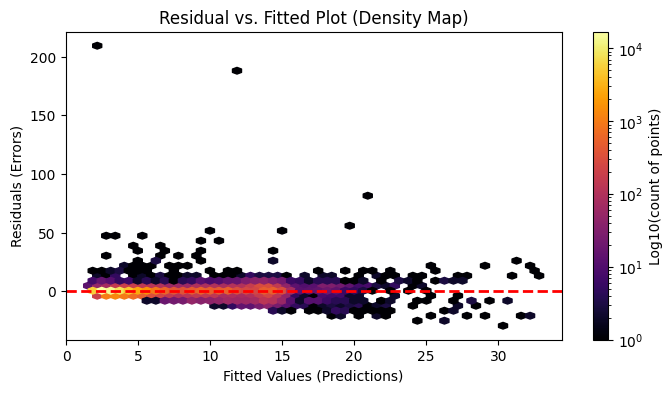

In [184]:
residuals=y_test-y_pred
# Checking for Predicion
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
# gridsize controls the resolution of the hexes
plt.hexbin(y_pred, residuals, gridsize=50, cmap='inferno', bins='log')
plt.axhline(0, color='red', linestyle='--', lw=2)  # Reference line at zero

plt.xlabel('Fitted Values (Predictions)')
plt.ylabel('Residuals (Errors)')
plt.title('Residual vs. Fitted Plot (Density Map)')
plt.colorbar(label='Log10(count of points)')
plt.savefig("Residual VS fitted plot TEST.png", dpi=300, bbox_inches='tight')
plt.show()

### This graph shape is like funnel or fan. It's clearly tells **Heteroscedasticity**, meaning the variance of your errors is not constant.
This non-constant variance violates a key assumption of many regression analyses, which can lead to inefficient coefficient estimates and unreliable statistical inferences like confidence intervals and hypothesis tests. Essentially, your model's predictions for larger values are less trustworthy and consistent than for smaller values

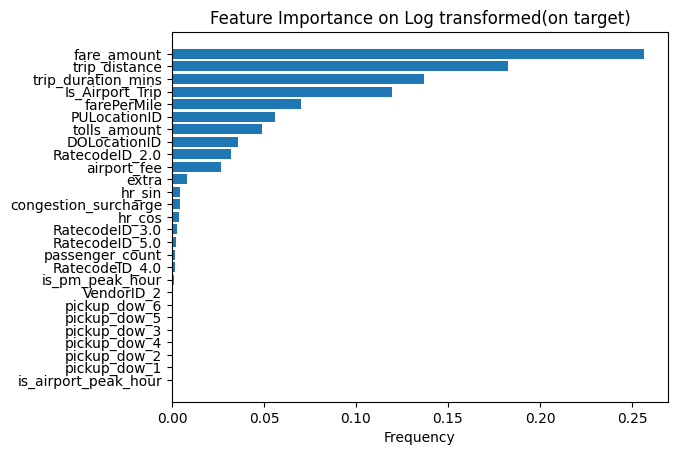

In [60]:
import matplotlib.pyplot as plt
importance=rf_strong1.feature_importances_

feature_names=X_train.columns
sorted_idx=importance.argsort()
plt.barh(feature_names[sorted_idx],importance[sorted_idx])
plt.xlabel("Frequency")
plt.title("Feature Importance on Log transformed(on target)")
plt.savefig("feature Importance of raw",dpi=300,bbox_inches='tight')
plt.show()

# Random Forest 2 Version 

### **Indight:** This Model gave me 
* New R2 Score: 0.6233
* New STRONG RMSE: 2.4735
* New R2 Score: 0.6235
* New STRONG RMSE: 2.4730
* New R2 Score: 0.6229 & New STRONG RMSE: 2.4748
* New R2 Score: 0.7036 &
* New STRONG RMSE: 2.2092
  **Before any Normal turning Standard scaler**
* New R2 Score: 0.5640
* New STRONG RMSE: 2.6795
  <br>
**Before any Normal turning Standard scaler**
  * 

**Random Forest regression model feature importance** provides a score for each input feature, indicating its relative contribution to the model's predictions. This information helps in understanding the data, improving model performance, and simplifying the model. 

## Solving Heteroscedasticity
**FOR Increasing R2 & RMSE**: 
* Tunned Hyperparamaeter couldn't get better performance
* We need to do re Feature Engineering{ feature selection ,feature extraction}

In [61]:
y_train.agg(['min','max','mean'])

min       0.010000
max     482.900000
mean      4.598549
Name: tip_amount, dtype: float64

**Log Transform on target variable**:y_train,y_test
#### I tried it couldn't get better result even worse then normal   
Log R2 Score: 0.6594 <br>
Log STRONG RMSE: 0.3099

In [62]:
# LOG Transform
tTrain=np.log1p(y_train)
tTest=np.log1p(y_test)

In [63]:
from sklearn.ensemble import RandomForestRegressor

# A "Strong" Random Forest that is allowed to learn deep patterns
rf_strong1 = RandomForestRegressor(
    n_estimators=150,        # More trees = more stable averaging
    max_depth=25,            # Constraint prevents overfitting to noise
    min_samples_leaf=20,     # Essential for 3.8M rows; smooths out the 'jaggies'
    max_samples=0.6,         # Speed hack: each tree sees 20% of data (approx 760k rows)
    max_features=0.4,     # Force diversity in trees
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Training Unchained Random Forest...")
rf_strong1.fit(X_train, tTrain)

Training Unchained Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  9.0min finished


RandomForestRegressor(max_depth=25, max_features=0.4, max_samples=0.6,
                      min_samples_leaf=20, n_estimators=150, n_jobs=-1,
                      random_state=42, verbose=1)

In [64]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# ---------------Trianing-----------
# 1. Generate predictions using the model
y_predTr = rf_strong1.predict(X_train)
y_pred_originalTr = np.expm1(y_predTr)

# 2. Now calculate the metrics using the PREDICTIONS, not the features
r2 = rf_strong1.score(X_train, tTrain)
rmse = np.sqrt(mean_squared_error(tTrain, y_predTr))
mae = mean_absolute_error(tTrain, y_predTr)
print("-----------Trainig--------------")
print(f"New R2 Score: {r2:.4f}")
print(f"New STRONG RMSE: {rmse:.4f}")
print(f"New STRONG MSE: {mean_squared_error(tTrain, y_predTr):.4f}")
print(f"New STRONG MAE: {mae:.4f}")



# --------Teseting------------
# 1. Generate predictions using the model
y_pred = rf_strong1.predict(X_test)

# 2. Now calculate the metrics using the PREDICTIONS, not the features
r2 = rf_strong1.score(X_test, tTest)
rmse = np.sqrt(mean_squared_error(tTest, y_pred))
mae = mean_absolute_error(tTest, y_pred)
print("-----------Testing--------------")
print(f"New R2 Score: {r2:.4f}")
print(f"New STRONG RMSE: {rmse:.4f}")
print(f"New STRONG MSE: {mean_squared_error(tTest, y_pred):.4f}")
print(f"New STRONG MAE: {mae:.4f}")

# New R2 Score: 0.6994
# New STRONG RMSE: 2.2247
# New R2 Score: 0.6592
# New STRONG RMSE: 0.3100

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.6s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.5s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


-----------Trainig--------------
New R2 Score: 0.6919
New STRONG RMSE: 0.2941
New STRONG MSE: 0.0865
New STRONG MAE: 0.2034


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:   14.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.1s


-----------Testing--------------
New R2 Score: 0.6585
New STRONG RMSE: 0.3095
New STRONG MSE: 0.0958
New STRONG MAE: 0.2138


[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:   14.4s finished


#### Log Transform Gave me  better result ,  Even though **RMSE: 0.3098** dropped suddenly .which is good ,But R2 Score: 0.6596

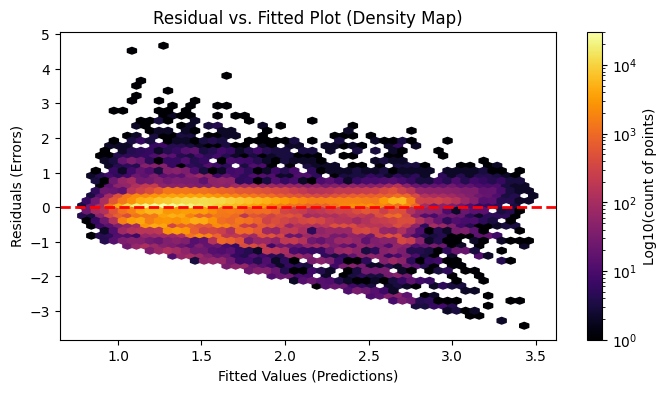

In [65]:
residuals=tTest-y_pred
# Checking for Predicion
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
# gridsize controls the resolution of the hexes
plt.hexbin(y_pred, residuals, gridsize=50, cmap='inferno', bins='log')
plt.axhline(0, color='red', linestyle='--', lw=2)  # Reference line at zero

plt.xlabel('Fitted Values (Predictions)')
plt.ylabel('Residuals (Errors)')
plt.title('Residual vs. Fitted Plot (Density Map)')
plt.colorbar(label='Log10(count of points)')
plt.savefig("Residual VS fitted plot after log transofrm.png", dpi=300, bbox_inches='tight')
plt.show()


###   Feature Importance on Log transformed

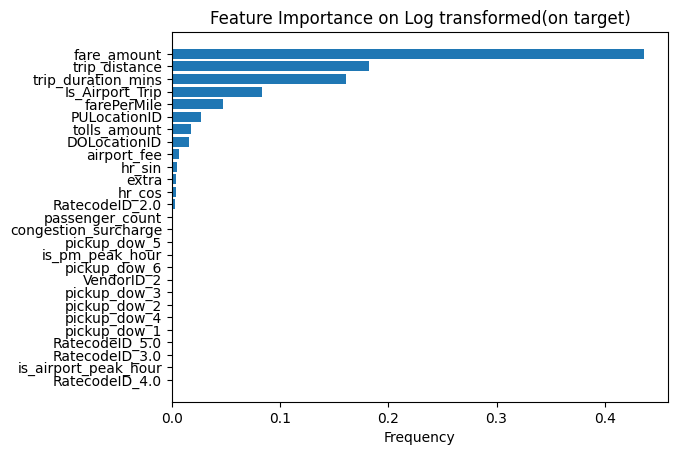

In [66]:
import matplotlib.pyplot as plt
importance=rf_strong1.feature_importances_

feature_names=X_train.columns
sorted_idx=importance.argsort()
plt.barh(feature_names[sorted_idx],importance[sorted_idx])
plt.xlabel("Frequency")
plt.title("Feature Importance on Log transformed(on target)")
plt.show()

###  Now going to convert log transform**(Back Transformation)**   back to original data(target) & prediction as well

In [67]:
y_train_original = np.expm1(tTrain)
y_true_original = np.expm1(tTest)
y_pred_original = np.expm1(y_pred)

In [68]:
print(y_true_original.agg(['min','max','mean']),y_test.agg(['min','max','mean']))

min       0.010000
max     380.800000
mean      4.592816
Name: tip_amount, dtype: float64 min       0.010000
max     380.800000
mean      4.592816
Name: tip_amount, dtype: float64


After inversing Log transform both data are same!! <br>
Let's calculate Evalutaion..

In [69]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

r2 =  r2_score(y_train_original, y_pred_originalTr)
rmse = np.sqrt(mean_squared_error(y_train_original, y_pred_originalTr))
mae = mean_absolute_error(y_train_original, y_pred_originalTr)
print("TESTING After Converting (log transform -> normal data)")
print(f"New R2 Score: {r2:.4f}")
print(f"New STRONG RMSE: {rmse:.4f}")
print(f"New STRONG MSE: {mean_squared_error(y_train_original, y_pred_originalTr):.4f}")
print(f"New STRONG MAE: {mae:.4f}")

r2 =  r2_score(y_true_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_true_original, y_pred_original))
mae = mean_absolute_error(y_true_original, y_pred_original)
print("TRAINING After Converting (log transform -> normal data)")
print(f"New R2 Score: {r2:.4f}")
print(f"New STRONG RMSE: {rmse:.4f}")
print(f"New STRONG MSE: {mean_squared_error(y_true_original, y_pred_original):.4f}")
print(f"New STRONG MAE: {mae:.4f}")

TESTING After Converting (log transform -> normal data)
New R2 Score: 0.7187
New STRONG RMSE: 2.1375
New STRONG MSE: 4.5690
New STRONG MAE: 1.1227
TRAINING After Converting (log transform -> normal data)
New R2 Score: 0.6936
New STRONG RMSE: 2.2256
New STRONG MSE: 4.9531
New STRONG MAE: 1.1831



After Converting (log transform -> normal data)
New R2 Score: 0.6901
New STRONG RMSE: 2.2587
New STRONG MSE: 5.1019
New STRONG MAE: 1.1908

**Density map on normal data**

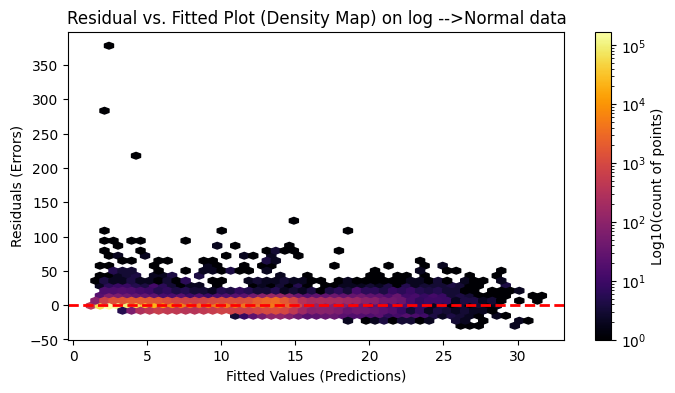

In [70]:
residuals=y_true_original-y_pred_original
# Checking for Predicion
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
# gridsize controls the resolution of the hexes
plt.hexbin(y_pred_original, residuals, gridsize=50, cmap='inferno', bins='log')
plt.axhline(0, color='red', linestyle='--', lw=2)  # Reference line at zero

plt.xlabel('Fitted Values (Predictions)')
plt.ylabel('Residuals (Errors)')
plt.title('Residual vs. Fitted Plot (Density Map) on log -->Normal data')
plt.colorbar(label='Log10(count of points)')
plt.savefig("Residual VS fitted plot after log transofrm->normal data.png", dpi=300, bbox_inches='tight')
plt.show()


**Insights from this graph:**<br>
* Points are quite scattered around than normal graph

####  Applying **Standard Scaler** on y_train,y_test

New R2 Score: 0.6591
New STRONG RMSE: 0.5838
New STRONG MSE: 0.3409
New STRONG MAE: 0.4075

So R2 suddenly dropped after applying Standard Sclaer 
* New R2 Score: 0.6996
* New STRONG RMSE: 0.5481

The issue is about the relationship between your features and the target variable, which scaling doesn't fix:
* Your model still has **large positive residuals (errors)** when it predicts **low tip amounts**.
* It has **very small residuals** when it predicts **high tip amounts**.


In [71]:
X_train_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917142 entries, 0 to 2917141
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   VendorID_2      float64
 1   RatecodeID_2.0  float64
 2   RatecodeID_3.0  float64
 3   RatecodeID_4.0  float64
 4   RatecodeID_5.0  float64
 5   pickup_dow_1    float64
 6   pickup_dow_2    float64
 7   pickup_dow_3    float64
 8   pickup_dow_4    float64
 9   pickup_dow_5    float64
 10  pickup_dow_6    float64
 11  PULocationID    float64
 12  DOLocationID    float64
dtypes: float64(13)
memory usage: 289.3 MB


**XGB Regressor**

In [185]:
from xgboost import XGBRegressor
# function for traing the model
def train_model( x_train,x_test,y_train):
  model=XGBRegressor(device="cuda")
  model.fit(x_train,y_train, 
        verbose=100)
  predictions=model.predict(x_test)
  return model,predictions

model,predictions=train_model(X_train,X_test,y_train)

e:\dsProject\nycTaxiProject\venv\Lib\site-packages\xgboost\training.py:200: UserWarning: [15:53:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:53: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
e:\dsProject\nycTaxiProject\venv\Lib\site-packages\xgboost\training.py:200: UserWarning: [15:53:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  bst.update(dtrain, iteration=i, fobj=obj)


In [186]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# 1. Generate predictions using the model
y_pred = model.predict(X_test)

# 2. Now calculate the metrics using the PREDICTIONS, not the features
r2 = model.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# printing all evaluation
print(f"New R2 Score: {r2:.4f}")
print(f"New STRONG RMSE: {rmse:.4f}")
print(f"New STRONG MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"New STRONG MAE: {mae:.4f}")

# New R2 Score: 0.6994
# New STRONG RMSE: 2.2247

New R2 Score: 0.6519
New STRONG RMSE: 2.4421
New STRONG MSE: 5.9637
New STRONG MAE: 1.1664


After removing noise:New R2 Score: 0.7014
New STRONG RMSE: 2.1973
New STRONG MSE: 4.8280
New STRONG MAE: 1.0763

In [187]:
# tune hyperparameter
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 1. Initialize XGBoost Regressor
# We use 'hist' because it is much faster for 3M+ rows
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,       # More trees than Random Forest (it learns slowly)
    learning_rate=0.05,      # "Shrinkage" - prevents overfitting
    max_depth=8,             # Shallower trees (Boosting prefers depth 6-10)
    min_child_weight=1,      # Similar to min_samples_leaf
    subsample=0.8,           # Train on 80% of rows per tree
    colsample_bytree=0.8,    # Train on 80% of columns per tree
    n_jobs=-1,
    random_state=42,
    tree_method='hist'       # CRITICAL for speed on large data
)

print("Training XGBoost...")
# Ensure boolean columns are integers for XGBoost (just in case)
X_train['Is_Airport_Trip'] = X_train['Is_Airport_Trip'].astype(int)
X_test['Is_Airport_Trip'] = X_test['Is_Airport_Trip'].astype(int)

# Fit the model
xgb_model.fit(X_train, y_train)

# --- Evaluation Function ---
def evaluate_model(model, X, y_true, name):
    y_pred = model.predict(X)
    
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"-----------{name} Evaluation-------------")
    print(f"R2 Score:   {r2:.4f}")
    print(f"RMSE:       {rmse:.4f}")
    print(f"MAE:        {mae:.4f}")

# Evaluate
evaluate_model(xgb_model, X_train, y_train, "Training")
evaluate_model(xgb_model, X_test, y_test, "Testing")

Training XGBoost...
-----------Training Evaluation-------------
R2 Score:   0.8608
RMSE:       1.5010
MAE:        0.9243
-----------Testing Evaluation-------------
R2 Score:   0.6495
RMSE:       2.4504
MAE:        1.1727


**Before Removing Feature Noise** <br>
Training XGBoost...
-----------Training Evaluation-------------<br>
R2 Score:   0.7703
RMSE:       1.9318
MAE:        1.0290<br>
-----------Testing Evaluation-------------<br>
R2 Score:   0.6996
RMSE:       2.2038
MAE:        1.0742
<br>
**After Removing Feature Noise**<br>
Training XGBoost...
-----------Training Evaluation-------------<br>
R2 Score:   0.7658
RMSE:       1.9503
MAE:        1.0352<br>
-----------Testing Evaluation-------------<br>
R2 Score:   0.6980
RMSE:       2.2096
MAE:        1.0774
<br>
**target variable cliped on y_train:**
Training XGBoost...
-----------Training Evaluation-------------
R2 Score:   0.7928
RMSE:       1.6912
MAE:        1.0080
-----------Testing Evaluation-------------
R2 Score:   0.6939
RMSE:       2.2244
MAE:        1.0830
<br>
**target variable not  cliped on y_train:**
Training XGBoost...
-----------Training Evaluation-------------
R2 Score:   0.7698
RMSE:       1.9336
MAE:        1.0291
-----------Testing Evaluation-------------
R2 Score:   0.7000
RMSE:       2.2022
MAE:        1.0748

**Insight:** so without Clipping on target variable gave us **better evaluatuoion** 

**Basic Xg Boost Regressor Evaluation:**
New R2 Score: 0.6877
New STRONG RMSE: 2.2678
New STRONG MSE: 5.1427
New STRONG MAE: 1.1178

### **Conclusion** : 
* I unscaled all independent variables & dependent variable ,then it gave be better Evaluation Metrics. It's even quite good before scale.<br>
  **Model:** RandomForestRegressor(
    n_estimators=150,        # More trees = more stable averaging
    max_depth=15,            # Constraint prevents overfitting to noise
    min_samples_leaf=50,     # Essential for 3.8M rows; smooths out the 'jaggies'
    max_samples=0.2,         # Speed hack: each tree sees 20% of data (approx 760k rows)
    max_features='sqrt',     # Force diversity in trees
    n_jobs=-1,
    random_state=42,
    verbose=1
)<br>

   **Evaluation:**  **R2 Score: 0.7001**,**RMSE: 2.2223**,**MSE: 4.9385** & **MAE: 1.0916**

  **Residuals vs Fitted plot:** Specifically, the "fan" or "cone" shape suggests that your model's prediction errors increase as the predicted tip amount increases.
  
* Then I did Log Transform on target Varaiable , With same model.My R2 is drop suddenly & RMS as well.<br>
  **Evaluation:** **R2 Score: 0.6596, RMSE: 0.3098, MSE: 0.0960, MAE: 0.2155**<br>
**After Converting (log transform -> normal data) Evaluation:**
New R2 Score: 0.6820
New STRONG RMSE: 2.2883
New STRONG MSE: 5.2361
New STRONG MAE: 1.2047
<br>  Log transform shrinks the effect of outliers,& pull the extreme values closer to the rest of the data

In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917142 entries, 0 to 2917141
Data columns (total 27 columns):
 #   Column                Dtype  
---  ------                -----  
 0   VendorID_2            float64
 1   RatecodeID_2.0        float64
 2   RatecodeID_3.0        float64
 3   RatecodeID_4.0        float64
 4   RatecodeID_5.0        float64
 5   pickup_dow_1          float64
 6   pickup_dow_2          float64
 7   pickup_dow_3          float64
 8   pickup_dow_4          float64
 9   pickup_dow_5          float64
 10  pickup_dow_6          float64
 11  PULocationID          float64
 12  DOLocationID          float64
 13  passenger_count       float64
 14  extra                 float64
 15  tolls_amount          float64
 16  congestion_surcharge  float64
 17  airport_fee           float64
 18  trip_distance         float64
 19  fare_amount           float64
 20  farePerMile           float64
 21  hr_sin                float64
 22  hr_cos                float64
 23  Is_Airp

###  Checkimg all indepenedent feature distribution using facet


In [76]:
numCol=x_train.select_dtypes(include="number").columns.to_list()
meltData=x_train[numCol].melt(var_name='Column',value_name='Value')
numCol

['VendorID',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'fare_amount',
 'extra',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pre_tip_amount',
 'pickup_dow',
 'is_weekend',
 'pickup_ampm',
 'trip_duration_mins',
 'is_airport_peak_hour',
 'is_pm_peak_hour',
 'avg_speed',
 'farePerMile',
 'hr_sin',
 'hr_cos']

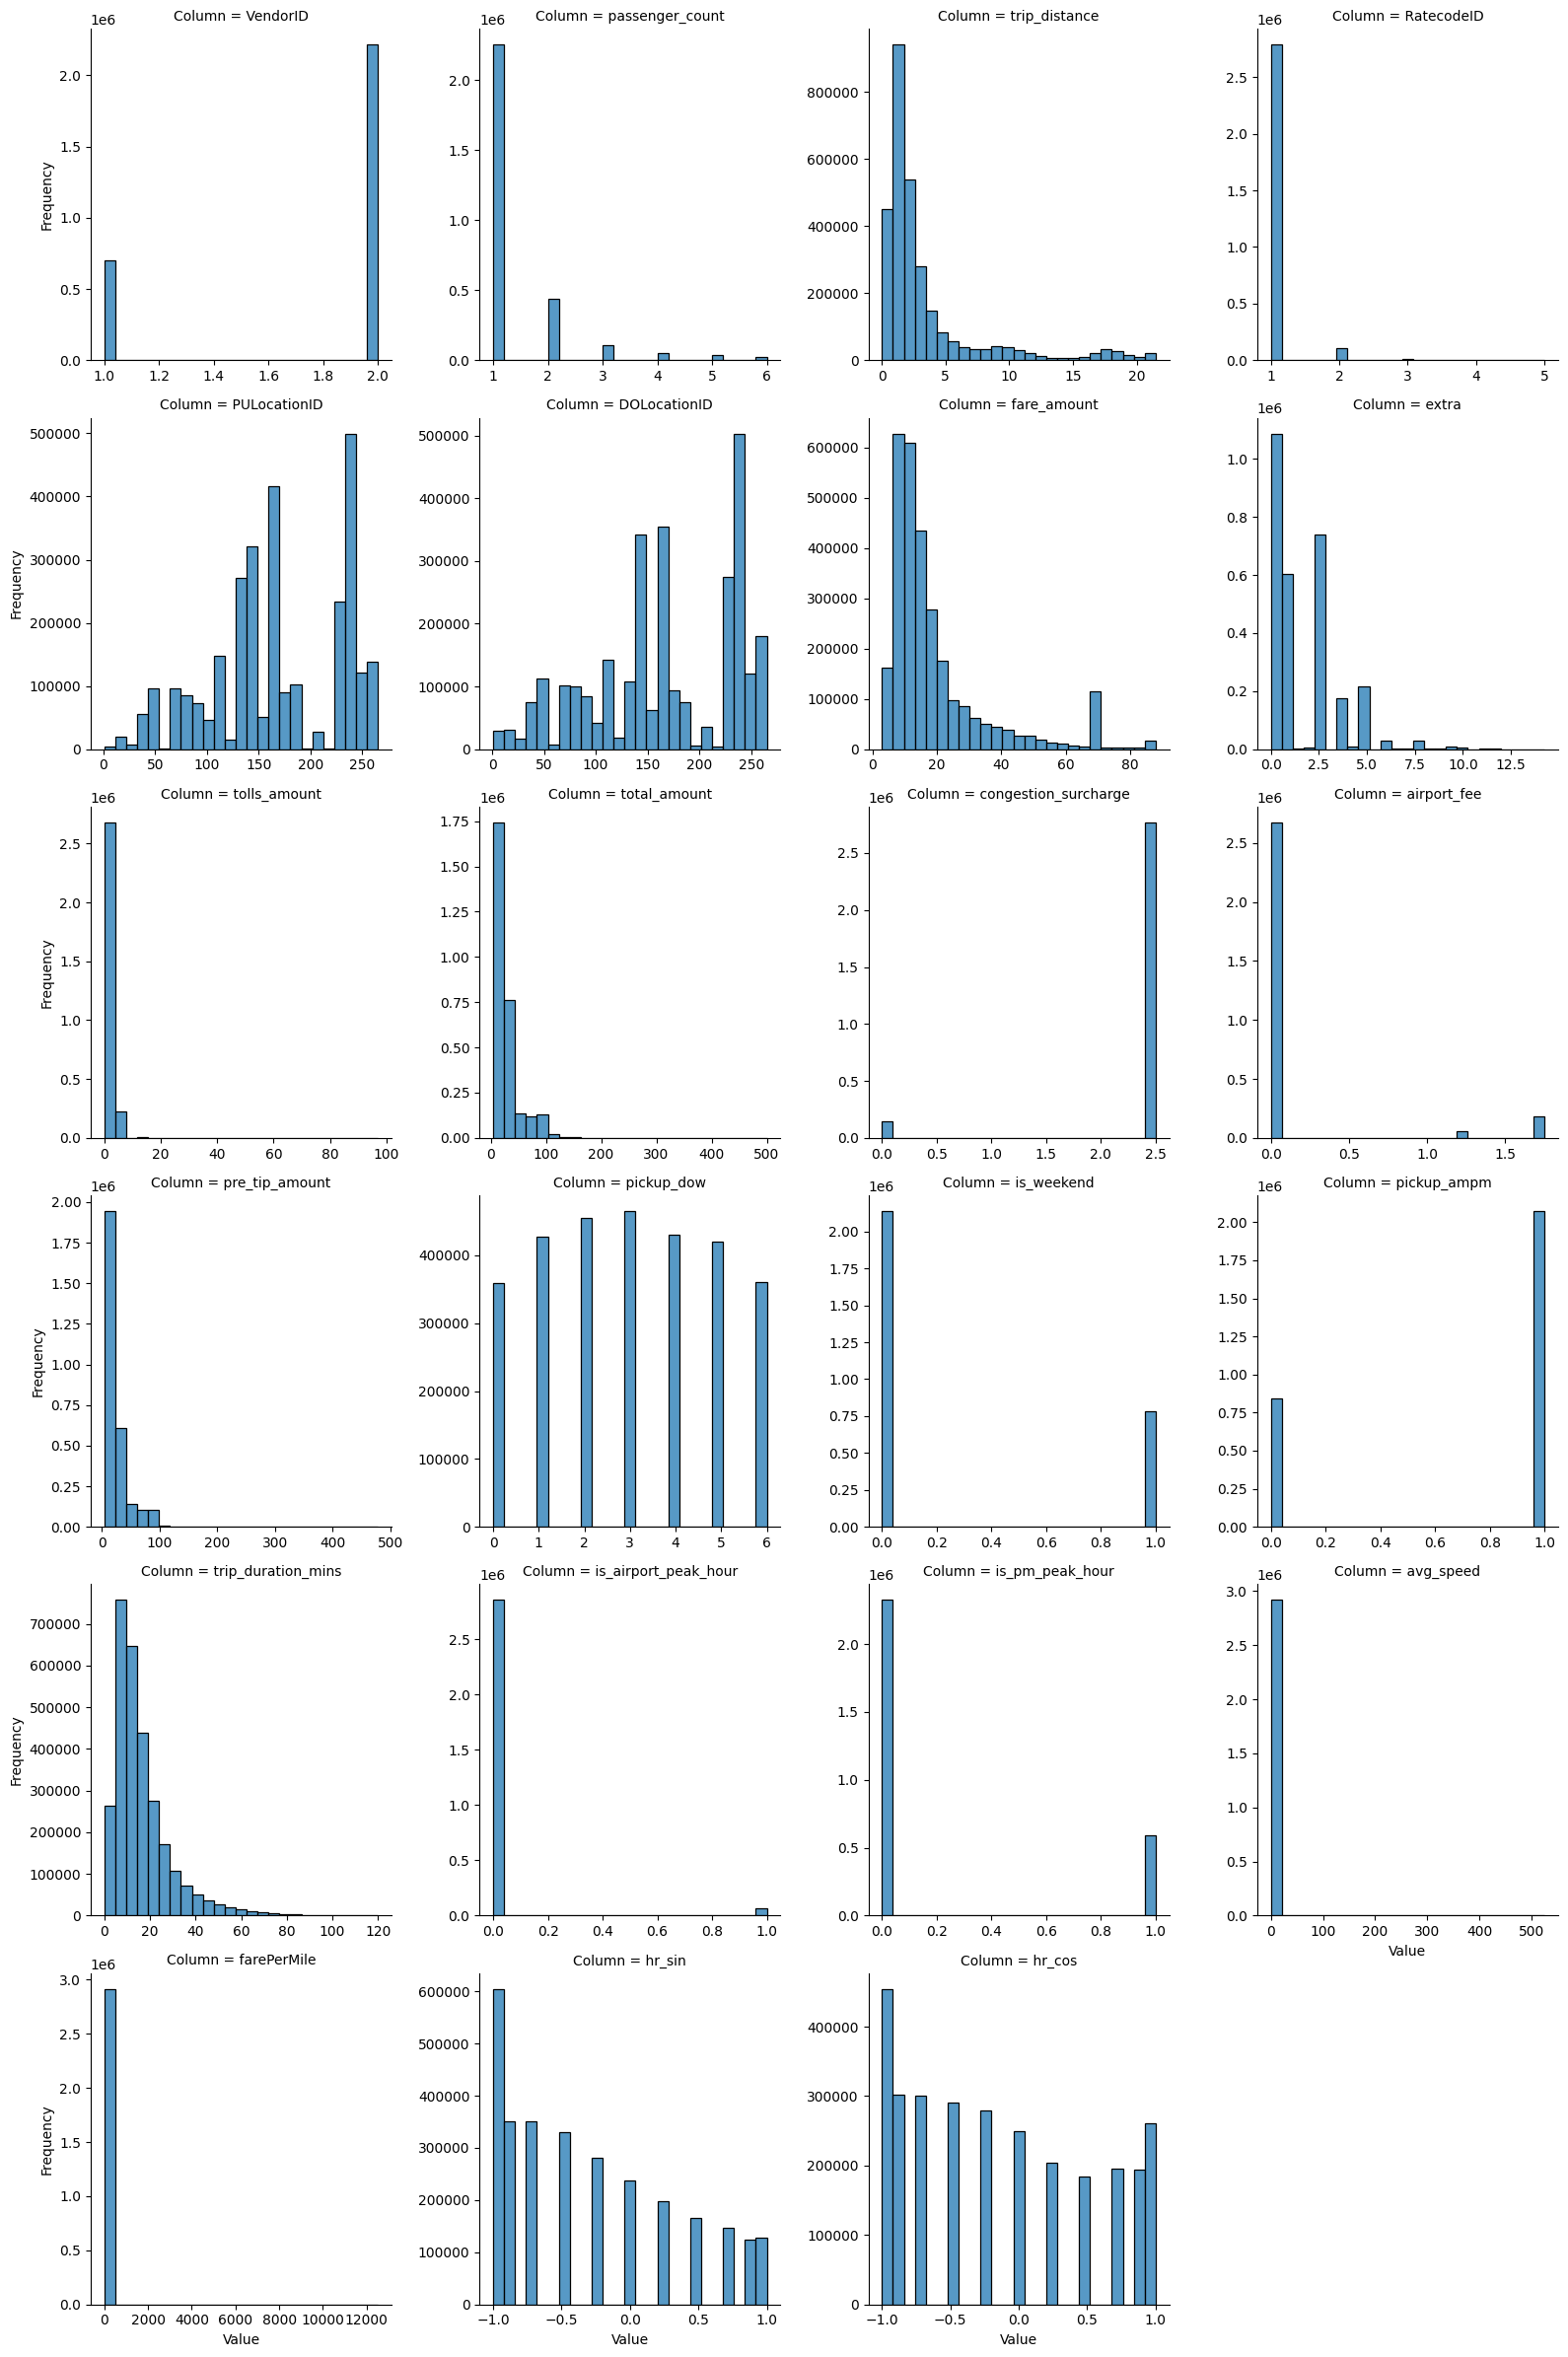

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.FacetGrid(meltData,col='Column',col_wrap=4,sharex=False,sharey=False,height=4)
g.map(sns.histplot,'Value',bins=25)
g.set_axis_labels('Value','Frequency')
plt.tight_layout()

# You can specify the file name and extension (e.g., .png, .pdf, .jpg)
# plt.savefig("my_seaborn_after.png", dpi=300) 
plt.show()

In [78]:
X_train.agg(['min','max','mean']).T

,min,max,mean
VendorID_2,0.000000,1.000000,0.759260
RatecodeID_2.0,0.000000,1.000000,0.038020
RatecodeID_3.0,0.000000,1.000000,0.003063
RatecodeID_4.0,0.000000,1.000000,0.001649
RatecodeID_5.0,0.000000,1.000000,0.002315
pickup_dow_1,0.000000,1.000000,0.146356
pickup_dow_2,0.000000,1.000000,0.156112
pickup_dow_3,0.000000,1.000000,0.159386
pickup_dow_4,0.000000,1.000000,0.147506
pickup_dow_5,0.000000,1.000000,0.143848


#### Feature Extraxtion   
* location from airport (analyze then create floag)
* most pickup tip hour(3-5AM)
* 

### Vosting Regressor (Rf + xgb Reg)  

In [188]:
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# 1. Define the Best Version of Random Forest (Your "Champion")
rf_best = RandomForestRegressor(
    n_estimators=150,
    max_depth=25,
    min_samples_leaf=10,
    max_samples=0.8,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)

# 2. Define a "Constrained" XGBoost (Forced to be less aggressive)
xgb_constrained = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,             # Reduced depth to stop overfitting
    min_child_weight=10,     # Increased to ignore tiny outlier groups
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42,
    tree_method='hist'
)

# 3. Create the Ensemble
# We give slightly more weight to Random Forest because it proved to be more stable
ensemble = VotingRegressor(
    estimators=[('rf', rf_best), ('xgb', xgb_constrained)],
    weights=[0.6, 0.4] 
)

print("Training Ensemble Model... (This combines the best of both worlds)")
# USE THE ORIGINAL X_TRAIN (With the "noisy" features included)
ensemble.fit(X_train, y_train)

# 4. Final Evaluation
def evaluate_model(model, X, y_true, name):
    y_pred = model.predict(X)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"-----------{name} Evaluation-------------")
    print(f"R2 Score:   {r2:.4f}")
    print(f"RMSE:       {rmse:.4f}")
    print(f"MAE:        {mae:.4f}")

evaluate_model(ensemble, X_train, y_train, "Training")
evaluate_model(ensemble, X_test, y_test, "Testing")

Training Ensemble Model... (This combines the best of both worlds)
-----------Training Evaluation-------------
R2 Score:   0.7633
RMSE:       1.9572
MAE:        1.0507
-----------Testing Evaluation-------------
R2 Score:   0.6671
RMSE:       2.3879
MAE:        1.1549


###  Acoording to me both models (Ranodm Forest & XG Boost ) are hitting  almost same Evaluation Metrices.
*  Random Foret With strong baseline , but with  **heavy compution time & RAM memory**
*  XGBoost Regressor baseline model  strong enough ,but tune hyperparameter can make overfit(But **Fast training & Less Meomory Require**).
*  When applied Voting regressor also hitting similar kinda Evaluation Metrics

We're basically stuck at plateu or hitting a data ceiling.We tried to sqeeze every drop from heavy fearture(fareAmount,trip ditance ,farepermile). <br>
SO our **indpendent feature are explaining 70% on Target variable**, but couldn't capture remianing 30%.<br>
**30% can be Human error**,The remaining 30% of error is likely Aleatoric Uncertainty (pure randomness). Some people just tip $50 because they are happy, and others tip $0 because they are having a bad day. No mathematical model can predict a passenger's mood.
<br>
**"I achieved an $R^2$ of 0.71, which is a strong baseline for human-behavioral data (tipping). I attempted to push this further using Gradient Boosting and a Voting Ensemble. The fact that the score stabilized at 0.71 across multiple architectures indicates that the remaining variance is likely due to unobserved factors (e.g., passenger mood, weather, driver rating) rather than model deficiency."**


### Light GBM

In [189]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# 1. Initialize LightGBM
# It is famous for speed and low memory usage
lgb_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,          # Key parameter for LightGBM (31 is standard)
    max_depth=-1,           # -1 means 'no limit', let the leaves grow
    min_child_samples=20,   # Similar to min_samples_leaf
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42
)

print("Training LightGBM (This should be fast)...")
lgb_model.fit(X_train, y_train)

# 2. Evaluation
def evaluate_model(model, X, y_true, name):
    y_pred = model.predict(X)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"-----------{name} Evaluation-------------")
    print(f"R2 Score:   {r2:.4f}")
    print(f"RMSE:       {rmse:.4f}")
    print(f"MAE:        {mae:.4f}")

evaluate_model(lgb_model, X_train, y_train, "Training")
evaluate_model(lgb_model, X_test, y_test, "Testing")

Training LightGBM (This should be fast)...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.030126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1725
[LightGBM] [Info] Number of data points in the train set: 285876, number of used features: 26
[LightGBM] [Info] Start training from score 4.569408
-----------Training Evaluation-------------
R2 Score:   0.7633
RMSE:       1.9572
MAE:        1.0801
-----------Testing Evaluation-------------
R2 Score:   0.6630
RMSE:       2.4026
MAE:        1.1615


**Withoud clippiing on y_train evaluation**<br>
-----------Training Evaluation-------------
R2 Score:   0.7270
RMSE:       2.1057
MAE:        1.0597
-----------Testing Evaluation-------------
R2 Score:   0.7038
RMSE:       2.1881
MAE:        1.0729
<br>
**Withoud clippiing on y_train evaluation**<br>


## SGD Regressor 

In [82]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# 1. Define Features (Same as before)
cat_onehot_features = ['VendorID', 'RatecodeID', 'pickup_dow']
cat_target_features = ['PULocationID', 'DOLocationID']
numerical_features = [
    'passenger_count', 'extra', 'tolls_amount', 
    'congestion_surcharge', 'airport_fee', 
    'trip_distance', 'fare_amount', 'farePerMile',
    'hr_sin', 'hr_cos', 'Is_Airport_Trip', 'trip_duration_mins',
    'is_airport_peak_hour', 'is_pm_peak_hour'
]

# 2. Update Preprocessor: MUST USE STANDARD SCALER
preprocessor = ColumnTransformer(
    transformers=[
        ('oneHot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), cat_onehot_features),
        ('tarEncoder', TargetEncoder(smooth="auto", target_type='continuous'), cat_target_features),
        # CHANGE: 'passthrough' -> StandardScaler()
        ('scaler', StandardScaler(), numerical_features) 
    ],
    verbose_feature_names_out=False
)

# 3. Create the Pipeline
# We use a Pipeline object to ensure scaling happens automatically before training
sgd_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(
        loss='huber',  # Standard Linear Regression
        penalty='l2',          # Ridge regularization to prevent overfitting
        alpha=0.0001,
        max_iter=1000,
        tol=1e-3,
        random_state=42,
        learning_rate='invscaling', 
        eta0=0.01              # Initial learning rate
    ))
])

print("Training SGD Regressor (Linear Model)...")
# Note: We use the raw X_train/y_train because the pipeline handles the scaling internally
sgd_pipeline.fit(x_train, y_train)

# 4. Evaluation
def evaluate_model(model, X, y_true, name):
    y_pred = model.predict(X)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"-----------{name} Evaluation-------------")
    print(f"R2 Score:   {r2:.4f}")
    print(f"RMSE:       {rmse:.4f}")
    print(f"MAE:        {mae:.4f}")

evaluate_model(sgd_pipeline, x_train, y_train, "Training")
evaluate_model(sgd_pipeline, x_test, y_test, "Testing")

Training SGD Regressor (Linear Model)...
-----------Training Evaluation-------------
R2 Score:   0.6840
RMSE:       2.2656
MAE:        0.9328
-----------Testing Evaluation-------------
R2 Score:   0.6830
RMSE:       2.2639
MAE:        0.9361


# Evaluation
**With 99 Percentile clip  on target(y_train) but already applied rest of dataset except** 
<br>
* -----------Training Evaluation-------------
R2 Score:   0.7031
RMSE:       2.0246
MAE:        0.9180
-----------Testing Evaluation-------------
R2 Score:   0.6844
RMSE:       2.2588
MAE:        0.9306
<br>
**Withou 99 Percentile on target , but already applied on independent  variable**
<br>
* -----------Training Evaluation-------------
R2 Score:   0.6840
RMSE:       2.2656
MAE:        0.9328
-----------Testing Evaluation-------------
R2 Score:   0.6830
RMSE:       2.2639
MAE:        0.9361

<br>

#### **Insight:**  Without Clipping on 99 percentile **better Evaluation** 

Model evaluation bursted With Robust Scaling .withoud it model gave good Evaluation

In [48]:
df['farePerMile'].head()

KeyError: 'farePerMile'

In [158]:
# Log transoform
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# 1. Define Features (Same as before)
cat_onehot_features = ['vendorid', 'ratecodeid', 'pickup_dow']
cat_target_features = ['pulocationid', 'dolocationid']
numerical_features = [
    'passenger_count', 'extra', 'tolls_amount', 
    'congestion_surcharge', 'airport_fee', 
    'trip_distance', 'fare_amount', 'farePerMile',
    'hr_sin', 'hr_cos', 'Is_Airport_Trip', 'trip_duration_mins',
    'is_airport_peak_hour', 'is_pm_peak_hour'
]

# 2. Update Preprocessor: MUST USE STANDARD SCALER
preprocessor = ColumnTransformer(
    transformers=[
        ('oneHot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), cat_onehot_features),
        ('tarEncoder', TargetEncoder(smooth="auto", target_type='continuous'), cat_target_features),
        # CHANGE: 'passthrough' -> StandardScaler()
        ('scaler', StandardScaler(), numerical_features) 
    ],
    verbose_feature_names_out=False
)

# 3. Create the Pipeline
# We use a Pipeline object to ensure scaling happens automatically before training
sgd_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(
        loss='squared_error',  # Standard Linear Regression
        penalty='l2',          # Ridge regularization to prevent overfitting
        alpha=0.0001,
        max_iter=1000,
        tol=1e-3,
        random_state=42,
        learning_rate='invscaling', 
        eta0=0.01              # Initial learning rate
    ))
])

print("Training SGD Regressor (Linear Model)...")
# Note: We use the raw X_train/y_train because the pipeline handles the scaling internally
sgd_pipeline.fit(x_train, y_train)

# 4. Evaluation
def evaluate_model(model, X, y_true, name):
    y_pred = model.predict(X)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"-----------{name} Evaluation-------------")
    print(f"R2 Score:   {r2:.4f}")
    print(f"RMSE:       {rmse:.4f}")
    print(f"MAE:        {mae:.4f}")
print("---------Log Transform SGD Regressor----------")
evaluate_model(sgd_pipeline, x_train, y_train, "Training")
evaluate_model(sgd_pipeline, x_test, y_test, "Testing")

Training SGD Regressor (Linear Model)...
---------Log Transform SGD Regressor----------
-----------Training Evaluation-------------
R2 Score:   0.6814
RMSE:       2.2705
MAE:        1.3406
-----------Testing Evaluation-------------
R2 Score:   0.6456
RMSE:       2.4639
MAE:        1.3543


Training SGD Regressor (Linear Model)...
---------Log Transform SGD Regressor----------
-----------Training Evaluation-------------
R2 Score:   0.6423
RMSE:       0.3169
MAE:        0.2247
-----------Testing Evaluation-------------
R2 Score:   0.6394
RMSE:       0.3181
MAE:        0.2253

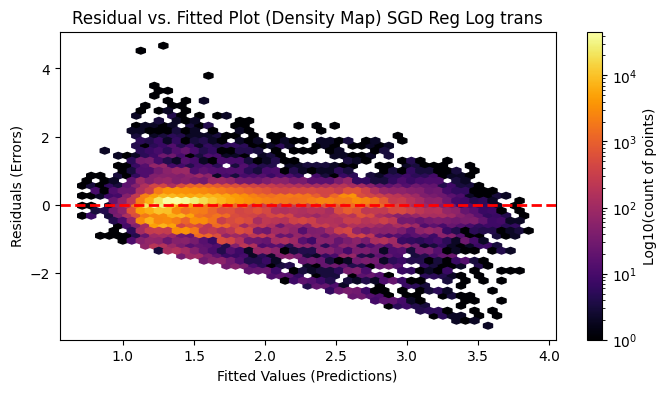

In [84]:
y_pred=sgd_pipeline.predict(x_test)
residuals=tTest-y_pred
# Checking for Predicion
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
# gridsize controls the resolution of the hexes
plt.hexbin(y_pred, residuals, gridsize=50, cmap='inferno', bins='log')
plt.axhline(0, color='red', linestyle='--', lw=2)  # Reference line at zero

plt.xlabel('Fitted Values (Predictions)')
plt.ylabel('Residuals (Errors)')
plt.title('Residual vs. Fitted Plot (Density Map) SGD Reg Log trans')
plt.colorbar(label='Log10(count of points)')
plt.savefig("Residual VS fitted plot after log transofrm(SGD).png", dpi=300, bbox_inches='tight')
plt.show()

In [85]:
y_train_original = np.expm1(tTrain)
y_true_original = np.expm1(tTest)
y_pred_original = np.expm1(y_pred)

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

r2 =  r2_score(y_train_original, y_pred_originalTr)
rmse = np.sqrt(mean_squared_error(y_train_original, y_pred_originalTr))
mae = mean_absolute_error(y_train_original, y_pred_originalTr)
print("TESTING After Converting (log transform -> normal data)")
print(f"New R2 Score: {r2:.4f}")
print(f"New STRONG RMSE: {rmse:.4f}")
print(f"New STRONG MSE: {mean_squared_error(y_train_original, y_pred_originalTr):.4f}")
print(f"New STRONG MAE: {mae:.4f}")

r2 =  r2_score(y_true_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_true_original, y_pred_original))
mae = mean_absolute_error(y_true_original, y_pred_original)
print("TRAINING After Converting (log transform -> normal data)")
print(f"New R2 Score: {r2:.4f}")
print(f"New STRONG RMSE: {rmse:.4f}")
print(f"New STRONG MSE: {mean_squared_error(y_true_original, y_pred_original):.4f}")
print(f"New STRONG MAE: {mae:.4f}")

TESTING After Converting (log transform -> normal data)
New R2 Score: 0.7187
New STRONG RMSE: 2.1375
New STRONG MSE: 4.5690
New STRONG MAE: 1.1227
TRAINING After Converting (log transform -> normal data)
New R2 Score: 0.6557
New STRONG RMSE: 2.3593
New STRONG MSE: 5.5664
New STRONG MAE: 1.2650


With standard Scaing Evaluation:<br>
Training SGD Regressor (Linear Model)...
-----------Training Evaluation-------------
R2 Score:   0.6861
RMSE:       2.0039
MAE:        0.9961
-----------Testing Evaluation-------------
R2 Score:   0.7002
RMSE:       1.9369
MAE:        0.9935


In [86]:
x_train.agg(['min','max','mean','median'])

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,extra,tolls_amount,total_amount,congestion_surcharge,airport_fee,pre_tip_amount,Is_Airport_Trip,pickup_dow,is_weekend,pickup_ampm,trip_duration_mins,is_airport_peak_hour,is_pm_peak_hour,avg_speed,farePerMile,hr_sin,hr_cos
min,1.00000,1.000000,0.020000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,4.580000,0.000000,0.00000,4.500000,False,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000,0.000247,0.171429,-1.000000,-1.000000
max,2.00000,6.000000,21.480000,5.000000,265.000000,265.000000,87.800000,14.250000,96.940000,500.000000,2.500000,1.75000,478.700000,True,6.000000,1.000000,1.000000,119.933333,1.000000,1.000000,525.000000,12515.000000,1.000000,1.000000
mean,1.75926,1.377078,3.412291,1.058352,166.705742,165.754131,19.277826,1.649499,0.598244,29.668161,2.372919,0.13481,25.670112,0.105742,2.986616,0.267284,0.710464,16.171837,0.021378,0.203168,0.193555,8.553972,-0.312473,-0.147221
median,2.00000,1.000000,1.810000,1.000000,162.000000,162.000000,13.500000,1.000000,0.000000,21.840000,2.500000,0.00000,19.000000,0.0,3.000000,0.000000,1.000000,12.650000,0.000000,0.000000,0.162129,7.128713,-0.500000,-0.258819


In [87]:
x_train['trip_distance'].value_counts().sort_index(ascending=False).head(20)
['trip_distance','fare_amount', 'farePerMile','extra', 'tolls_amount','avg_speed']

['trip_distance',
 'fare_amount',
 'farePerMile',
 'extra',
 'tolls_amount',
 'avg_speed']

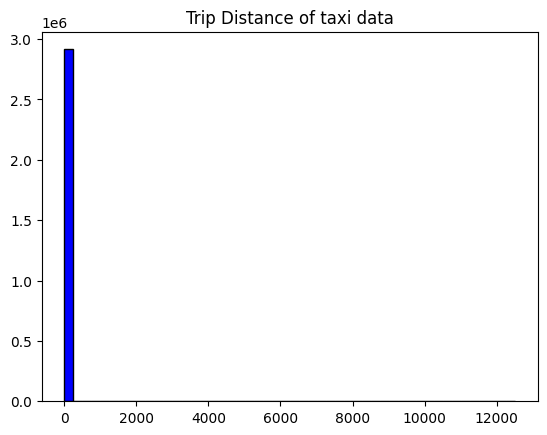

In [88]:
plt.hist(x_train['farePerMile'],bins=50,color='blue',edgecolor='black')
plt.title("Trip Distance of taxi data")
plt.savefig("tripDistance.png",dpi=300,bbox_inches='tight')
plt.show()

**Residual VS Fitted plot**

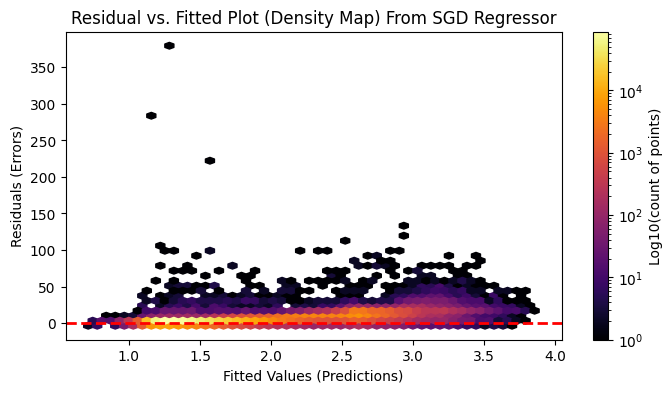

In [89]:
y_pred=sgd_pipeline.predict(x_test)
residuals=y_test-y_pred
# Checking for Predicion
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
# gridsize controls the resolution of the hexes
plt.hexbin(y_pred, residuals, gridsize=50, cmap='inferno', bins='log')
plt.axhline(0, color='red', linestyle='--', lw=2)  # Reference line at zero

plt.xlabel('Fitted Values (Predictions)')
plt.ylabel('Residuals (Errors)')
plt.title('Residual vs. Fitted Plot (Density Map) From SGD Regressor')
plt.colorbar(label='Log10(count of points)')
plt.savefig("Residual VS fitted plot TEST(SGD Regressor).png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

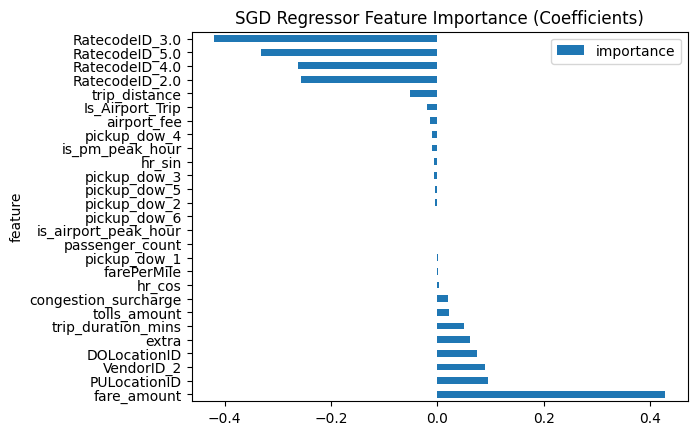

In [90]:
# 1. Get feature names from the preprocessor step
feature_names = sgd_pipeline.named_steps['preprocessor'].get_feature_names_out()

# 2. Get coefficients from the model step
coefficients = sgd_pipeline.named_steps['regressor'].coef_

# 3. Combine into a readable DataFrame
import pandas as pd
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': coefficients
}).sort_values(by='importance', ascending=False)

# print(importance_df)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
importance_df.plot(kind='barh', x='feature', y='importance')
plt.title("SGD Regressor Feature Importance (Coefficients)")
plt.savefig("feature Importance sgd",dpi=300, bbox_inches='tight')
plt.show()


In [91]:
preprocessor 

ColumnTransformer(transformers=[('oneHot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['VendorID', 'RatecodeID', 'pickup_dow']),
                                ('tarEncoder',
                                 TargetEncoder(target_type='continuous'),
                                 ['PULocationID', 'DOLocationID']),
                                ('scaler', StandardScaler(),
                                 ['passenger_count', 'extra', 'tolls_amount',
                                  'congestion_surcharge', 'airport_fee',
                                  'trip_distance', 'fare_amount', 'farePerMile',
                                  'hr_sin', 'hr_cos', 'Is_Airport_Trip',
                                  'trip_duration_mins', 'is_airport_peak_hour',
                                  'is_pm_peak_hour'])],
                  verbose_feature_names_out=False)

In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917142 entries, 0 to 2917141
Data columns (total 27 columns):
 #   Column                Dtype  
---  ------                -----  
 0   VendorID_2            float64
 1   RatecodeID_2.0        float64
 2   RatecodeID_3.0        float64
 3   RatecodeID_4.0        float64
 4   RatecodeID_5.0        float64
 5   pickup_dow_1          float64
 6   pickup_dow_2          float64
 7   pickup_dow_3          float64
 8   pickup_dow_4          float64
 9   pickup_dow_5          float64
 10  pickup_dow_6          float64
 11  PULocationID          float64
 12  DOLocationID          float64
 13  passenger_count       float64
 14  extra                 float64
 15  tolls_amount          float64
 16  congestion_surcharge  float64
 17  airport_fee           float64
 18  trip_distance         float64
 19  fare_amount           float64
 20  farePerMile           float64
 21  hr_sin                float64
 22  hr_cos                float64
 23  Is_Airp

trip_distance,farePerMile,avg_speed,trip_duration_mins,fare_amount,
<br>
'farePerMile', 'avg_speed', 'total_amount', 'tolls_amount', 'trip_distance', 'trip_duration_mins'

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder, RobustScaler
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# --- STEP 1: MANUALLY CLIP THE EXTREME OUTLIERS FIRST ---
# SGD is sensitive. We must remove the "physics-breaking" data points.
# Fare per mile > 50 is likely an error or almost infinite.
# Speed > 60 mph in NYC is impossible.
mask = (
    (x_train['farePerMile'] < 50) & 
    (x_train['avg_speed'] < 60) &
    (x_train['fare_amount'] < 200)
)
print(f"Dropping {len(x_train) - mask.sum()} extreme rows to save SGD...")
x_train_clean = x_train[mask].copy()
y_train_clean = y_train[mask].copy()


# --- STEP 2: DEFINE FEATURES ---
cat_onehot_features = ['VendorID', 'RatecodeID', 'pickup_dow']
cat_target_features = ['PULocationID', 'DOLocationID']

# STRATEGY CHANGE: Put the "Dangerous" columns into StandardScaler
# StandardScaler divides by Variance, which squashes outliers harder than RobustScaler
all_numerical_features = [
    'passenger_count', 'congestion_surcharge', 'airport_fee', 
    'hr_sin', 'hr_cos', 'Is_Airport_Trip', 'trip_duration_mins',
    'is_airport_peak_hour', 'is_pm_peak_hour',
    'trip_distance','fare_amount', 'farePerMile','extra', 'tolls_amount','avg_speed'
]

# --- STEP 3: PREPROCESSOR ---
preprocessor = ColumnTransformer(
    transformers=[
        ('oneHot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), cat_onehot_features),
        ('tarEncoder', TargetEncoder(smooth="auto", target_type='continuous'), cat_target_features),
        # Use StandardScaler for EVERYTHING numerical to force variance to 1.0
        ('scaler', StandardScaler(), all_numerical_features), 
    ],
    verbose_feature_names_out=False
)

# --- STEP 4: PIPELINE WITH TARGET SCALING ---
# We wrap the regressor to scale 'y' (tip amount) automatically
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=SGDRegressor(
            loss='squared_error',
            penalty='l2',
            alpha=0.01,           # Stronger regularization
            max_iter=5000,
            tol=1e-3,
            random_state=42,
            learning_rate='adaptive', 
            eta0=0.001
        ),
        # This scales the Target (Tip) to mean 0, std 1 before training
        # And automatically un-scales predictions back to dollars
        transformer=StandardScaler() 
    ))
])

print("Training SGD Regressor (With Data Clipping & Target Scaling)...")
model.fit(x_train_clean, y_train_clean)

# 5. Evaluation
def evaluate_model(model, X, y_true, name):
    y_pred = model.predict(X)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"-----------{name} Evaluation-------------")
    print(f"R2 Score:   {r2:.4f}")
    print(f"RMSE:       {rmse:.4f}")
    print(f"MAE:        {mae:.4f}")
    
evaluate_model(model, x_train_clean, y_train_clean, "Training")
# Note: For Testing, we use the original (dirty) X_test to see if the model survives reality
evaluate_model(model, x_test, y_test, "Testing")

Dropping 4130 extreme rows to save SGD...
Training SGD Regressor (With Data Clipping & Target Scaling)...
-----------Training Evaluation-------------
R2 Score:   0.6986
RMSE:       2.2042
MAE:        1.0753
-----------Testing Evaluation-------------
R2 Score:   0.6520
RMSE:       2.3719
MAE:        1.0940


## After applying log transform

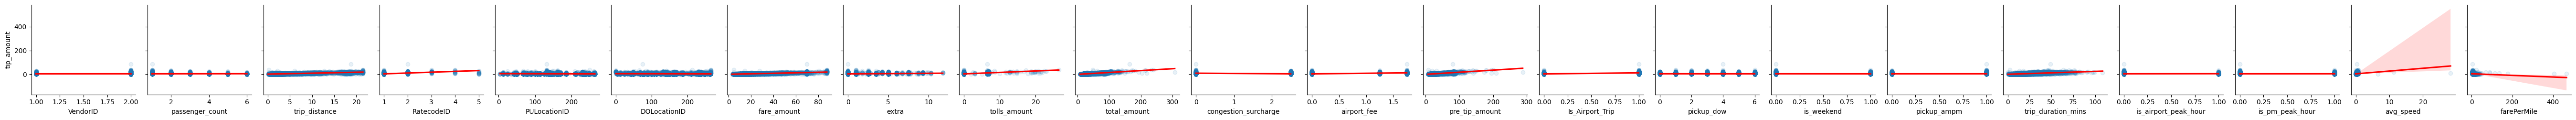

In [94]:
train_df=pd.concat([x_train,y_train],axis=1)

# Take a representative sample
sample_df = train_df.sample(n=10000, random_state=42)

target_col=sample_df.columns[-1]
# Use pairplot on the sample, focusing only on Target
sns.pairplot(sample_df, y_vars=[target_col], x_vars=sample_df.columns[:22], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
plt.savefig("Feature linearity check.png",dpi=300, bbox_inches='tight')
plt.show()


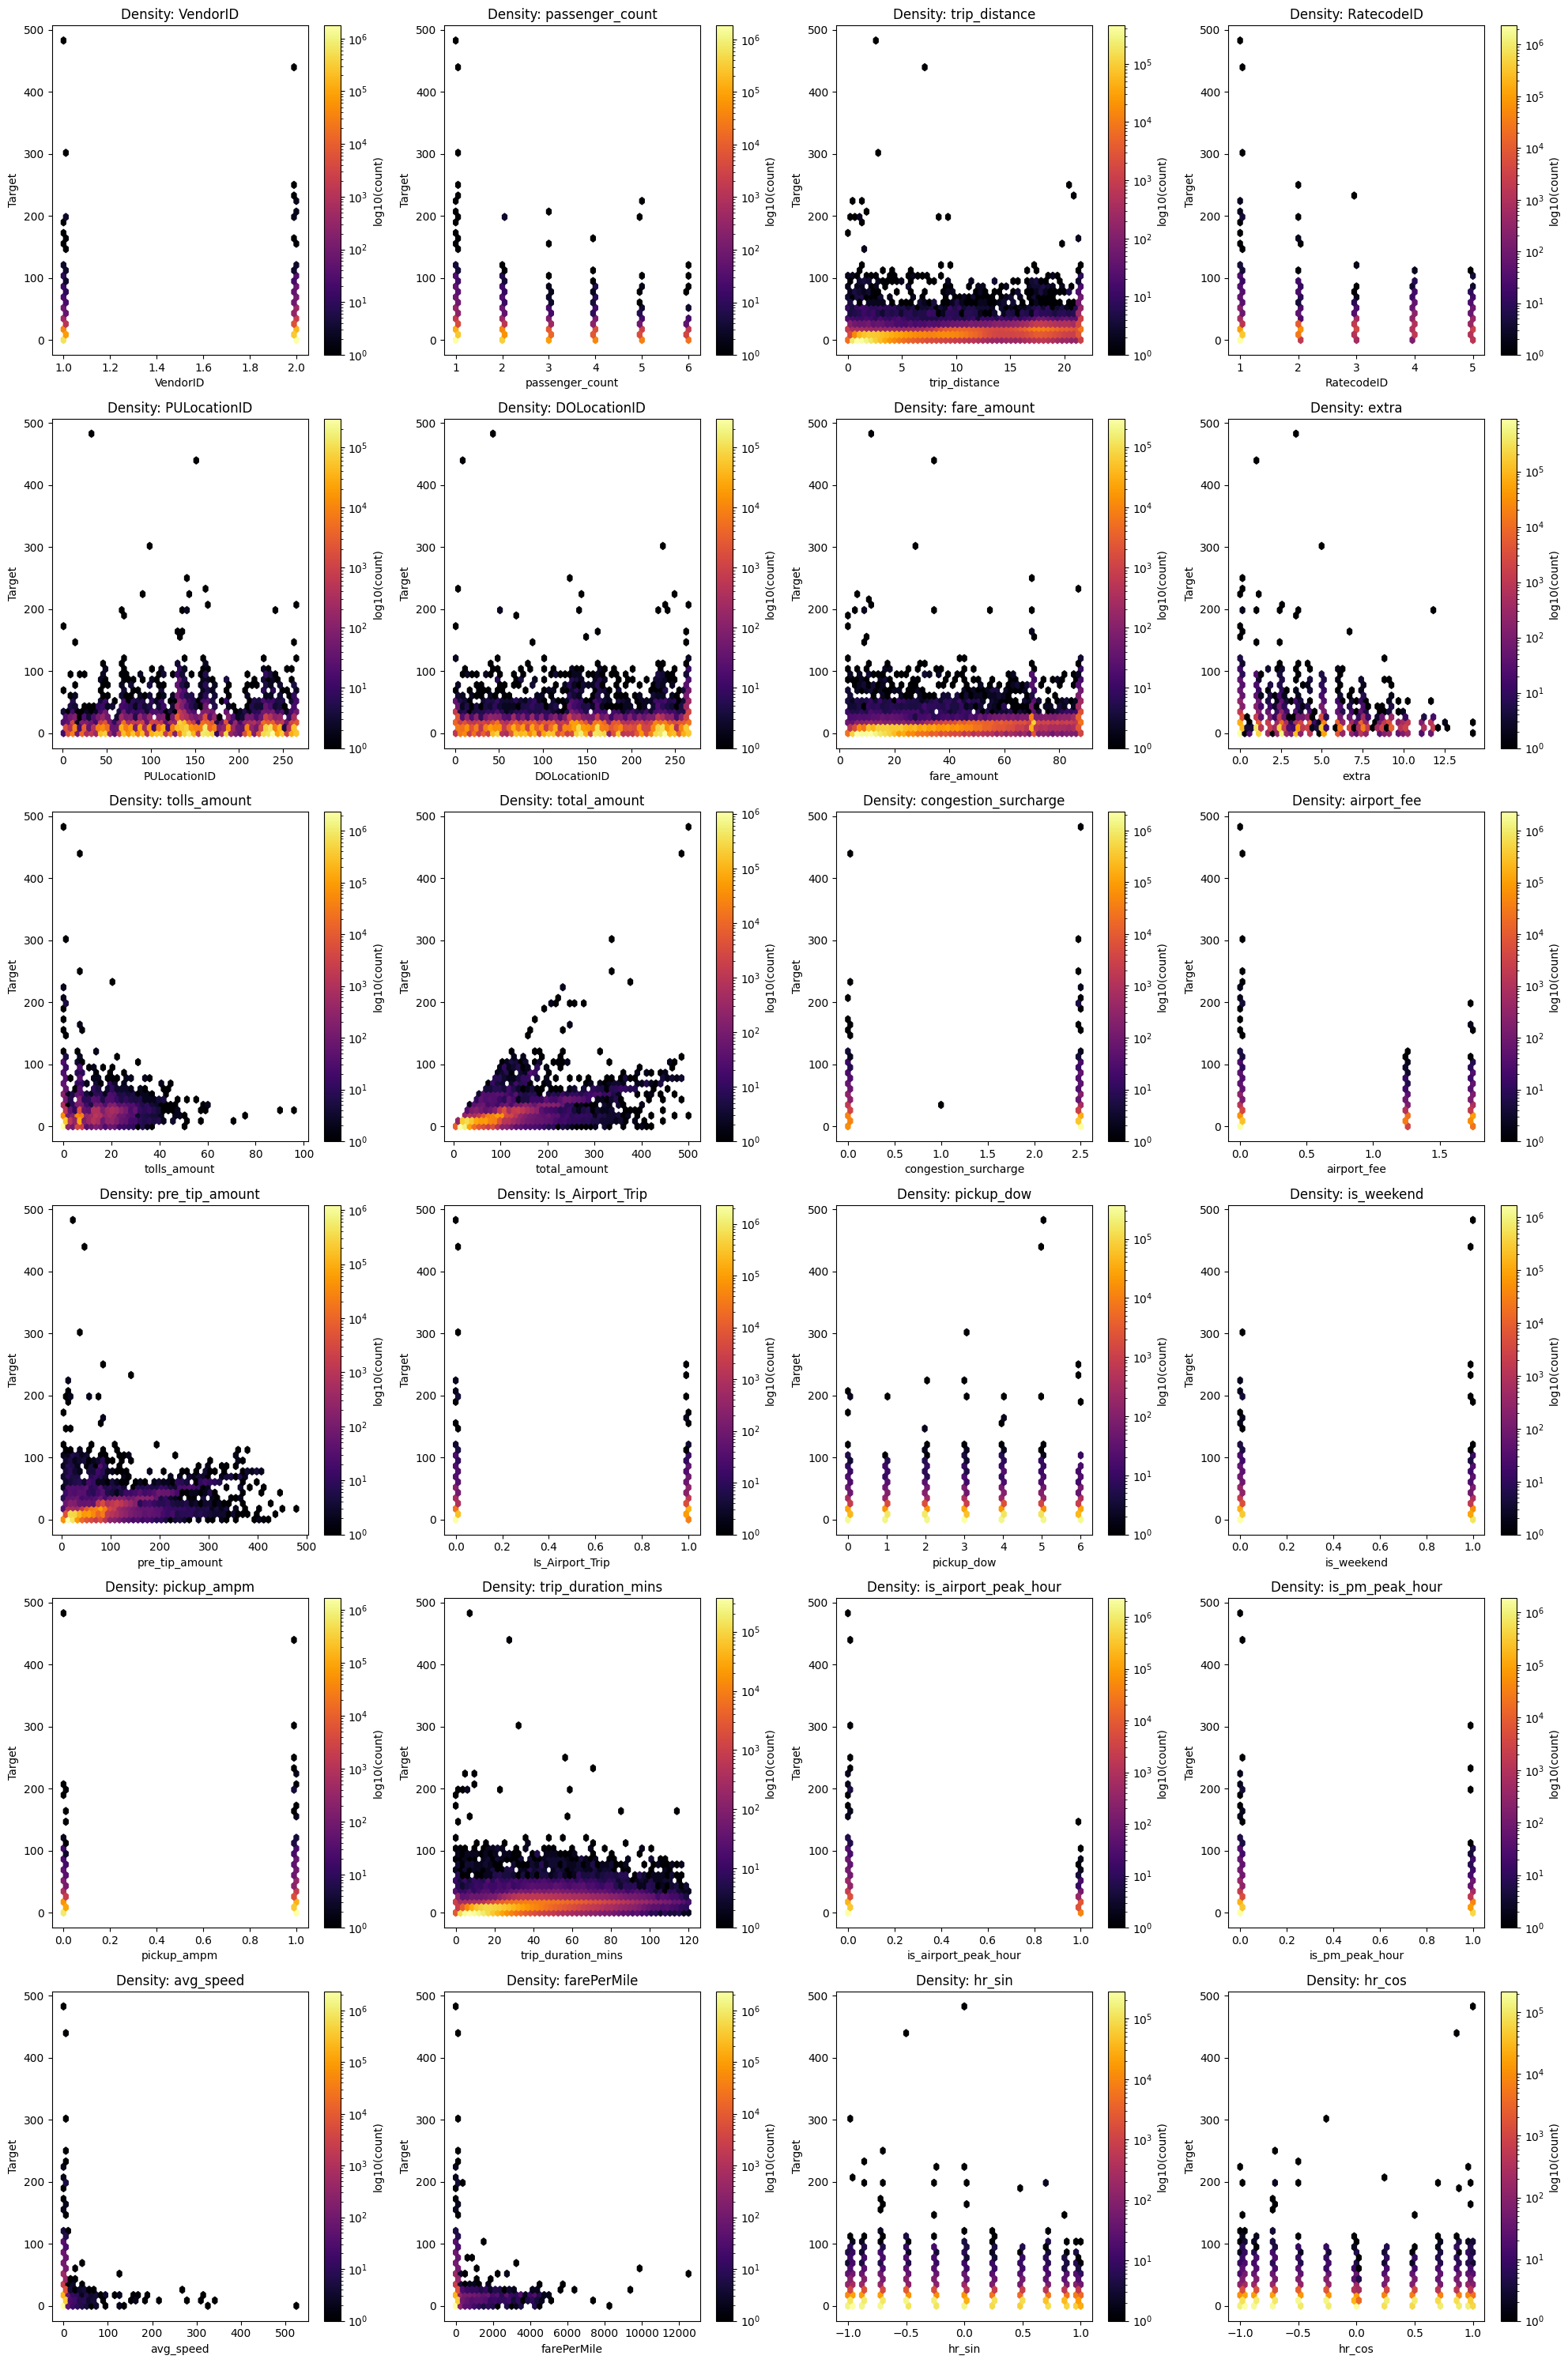

In [95]:
import matplotlib.pyplot as plt
import math

# 1. Configuration
features = x_train.columns
cols = 4
rows = math.ceil(len(features) / cols)

# 2. Create the Figure
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
axes = axes.flatten()

# 3. Plotting Loop
for i, col_name in enumerate(features):
    # 'gridsize' controls hexagon size; 'bins=log' handles wide density ranges
    hb = axes[i].hexbin(x_train[col_name], y_train, gridsize=50, cmap='inferno', bins='log')
    axes[i].set_title(f'Density: {col_name}', fontsize=12)
    axes[i].set_xlabel(col_name)
    axes[i].set_ylabel('Target')
    fig.colorbar(hb, ax=axes[i], label='log10(count)')

# Clean up empty slots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("Feature linearity hexbin check.png",dpi=300, bbox_inches='tight')
plt.show()


In [96]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917142 entries, 0 to 2917141
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   VendorID              int64  
 1   passenger_count       float64
 2   trip_distance         float64
 3   RatecodeID            float64
 4   PULocationID          int64  
 5   DOLocationID          int64  
 6   fare_amount           float64
 7   extra                 float64
 8   tolls_amount          float64
 9   total_amount          float64
 10  congestion_surcharge  float64
 11  airport_fee           float64
 12  pre_tip_amount        float64
 13  Is_Airport_Trip       bool   
 14  pickup_dow            int32  
 15  is_weekend            int64  
 16  pickup_ampm           int64  
 17  trip_duration_mins    float64
 18  is_airport_peak_hour  int64  
 19  is_pm_peak_hour       int64  
 20  avg_speed             float64
 21  farePerMile           float64
 22  hr_sin                float64
 23  hr_cos 

In [97]:
x_train['fare_amount'].agg(['min','max','mean'])

min      3.000000
max     87.800000
mean    19.277826
Name: fare_amount, dtype: float64

In [98]:
x_train.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,extra,tolls_amount,total_amount,congestion_surcharge,airport_fee,pre_tip_amount,Is_Airport_Trip,pickup_dow,is_weekend,pickup_ampm,trip_duration_mins,is_airport_peak_hour,is_pm_peak_hour,avg_speed,farePerMile,hr_sin,hr_cos
0,2,1.0,1.58,1.0,230,48,12.8,1.0,0.0,18.80,2.5,0.0,17.8,False,2,0,0,12.283333,0,0,0.128630,8.101266,0.000000,1.000000e+00
1,2,1.0,1.02,1.0,68,170,8.6,0.0,0.0,14.49,2.5,0.0,12.6,False,2,0,0,6.966667,1,0,0.146411,8.431373,1.000000,6.123234e-17
2,2,1.0,1.76,1.0,262,239,10.7,0.0,0.0,16.10,2.5,0.0,14.7,False,5,1,1,8.283333,0,0,0.212475,6.079545,-0.258819,-9.659258e-01
3,2,1.0,1.69,1.0,107,125,11.4,1.0,0.0,19.19,2.5,0.0,16.4,False,3,0,1,10.000000,0,0,0.169000,6.745562,-0.866025,5.000000e-01
4,2,2.0,1.38,1.0,234,100,10.7,1.0,0.0,18.84,2.5,0.0,15.7,False,6,1,1,10.183333,0,0,0.135516,7.753623,-0.707107,7.071068e-01


In [99]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee,pre_tip_amount,Is_Airport_Trip,pickup_dow,is_weekend,pickup_ampm,trip_duration_mins,is_airport_peak_hour,is_pm_peak_hour,avg_speed,farePerMile,hr_sin,hr_cos
0,1,2.0,0.60,1.0,48,142,5.1,2.5,1.80,0.0,10.90,2.5,0.0,11.6,False,5,1,0,2.133333,0,0,0.281250,8.500000,7.071068e-01,-0.707107
3,2,1.0,1.34,1.0,163,237,14.2,0.0,1.50,0.0,19.70,2.5,0.0,18.2,False,2,0,1,15.216667,0,0,0.088061,10.597015,1.224647e-16,-1.000000
4,2,1.0,1.22,1.0,234,211,9.3,0.0,3.33,0.0,16.63,2.5,0.0,13.3,False,1,0,0,7.533333,0,0,0.161947,7.622951,7.071068e-01,-0.707107
5,1,1.0,2.20,1.0,87,79,12.8,3.5,3.55,0.0,21.35,2.5,0.0,20.3,False,5,1,0,11.000000,1,0,0.200000,5.818182,8.660254e-01,0.500000
6,2,1.0,0.97,1.0,237,229,10.0,2.5,3.30,0.0,19.80,2.5,0.0,16.5,False,1,0,1,10.016667,0,1,0.096839,10.309278,-8.660254e-01,-0.500000



eVALUATIONS:
RF-MODEL:
-----------Training Evalutaion-------------
New R2 Score: 0.7444
New STRONG RMSE: 2.0374
New STRONG MSE: 4.1511
New STRONG MAE: 1.0016

-----------Testing Evalutaion-------------
New R2 Score: 0.7050
New STRONG RMSE: 2.1838
New STRONG MSE: 4.7692
New STRONG MAE: 1.0729

XGBoost reg:

Training XGBoost...
-----------Training Evaluation-------------
R2 Score:   0.7698
RMSE:       1.9336
MAE:        1.0291
-----------Testing Evaluation-------------
R2 Score:   0.7000
RMSE:       2.2022
MAE:        1.0748

Vooting RegressorRF+ XGB Reg):
-----------Training Evaluation-------------
R2 Score:   0.7402
RMSE:       2.0542
MAE:        1.0224
-----------Testing Evaluation-------------
R2 Score:   0.7056
RMSE:       2.1814
MAE:        1.0714


Light GBM:
-----------Training Evaluation-------------
R2 Score:   0.7591
RMSE:       1.8238
MAE:        1.0399
-----------Testing Evaluation-------------
R2 Score:   0.7038
RMSE:       2.1881
MAE:        1.0729


SGD REGRESSOR:
-----------Training Evaluation-------------
R2 Score:   0.6840
RMSE:       2.2656
MAE:        0.9328
-----------Testing Evaluation-------------
R2 Score:   0.6830
RMSE:       2.2639
MAE:        0.9361


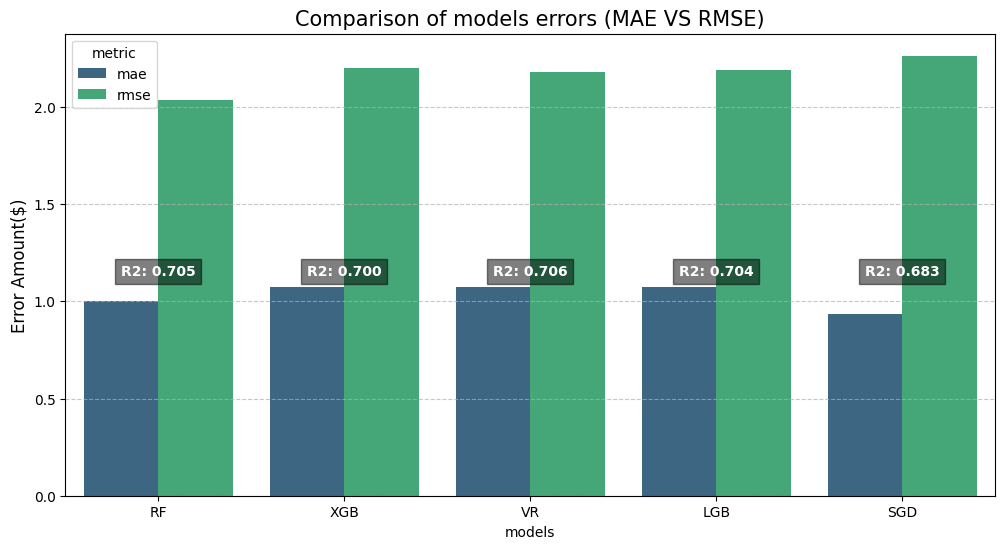

In [101]:
# organise the test data
result_data={'models':['RF','XGB','VR','LGB','SGD'],
    'r2':[0.7050,0.7000,0.7056,0.7038,0.6830],
    'mae':[1.0016,1.0748,1.0714,1.0729,0.9361],
    'rmse':[2.0374,2.2022,2.1814,2.1881,2.2639]
    }

# convert dict to dataframe
df_results=pd.DataFrame(result_data)

#  melt MAE & RMSE
df_melted=df_results.melt(id_vars='models',value_vars=['mae','rmse'],
var_name='metric',value_name='Error_value')

# ploting
plt.figure(figsize=(12,6))
sns.barplot(x='models', y='Error_value', hue='metric', data=df_melted,palette='viridis')
plt.title('Comparison of models errors (MAE VS RMSE)',fontsize=15)
plt.ylabel("Error Amount($)",fontsize=12)
plt.grid(axis='y',linestyle='--',alpha=0.7)

# adding the R2 Scre as a text label above the bars for reference
for i,r2 in enumerate(df_results['r2']):
    plt.text(i,max(df_results['rmse'])*0.5, f"R2: {r2:.3f}",
            ha='center',color='white',fontweight='bold',bbox=dict(facecolor='black',alpha=0.5))
    
plt.show()

# K Fold Cross Validation

###  sgd regressor variable defininig

In [115]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def sgd_var(x_train,x_test,y_train):
    # 1. Define Features (Same as before)
    cat_onehot_features = ['VendorID', 'RatecodeID', 'pickup_dow']
    cat_target_features = ['PULocationID', 'DOLocationID']
    numerical_features = [
        'passenger_count', 'extra', 'tolls_amount', 
        'congestion_surcharge', 'airport_fee', 
        'trip_distance', 'fare_amount', 'farePerMile',
        'hr_sin', 'hr_cos', 'Is_Airport_Trip', 'trip_duration_mins',
        'is_airport_peak_hour', 'is_pm_peak_hour'
    ]

    preprocessor=ColumnTransformer(
        transformers=[
            ('onehot',OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False),cat_onehot_features),
            ('target',TargetEncoder(smooth="auto", target_type='continuous'),cat_target_features),
            ('standardScaler',StandardScaler(),numerical_features)
        ]
    )
    # preprocessor.set_output(transform="pandas") # magic line for turning into dataframe
    # fit & transform the training data
    x_trainEncoded=preprocessor.fit_transform(x_train,y_train)

     # fit & transform the training data
    x_testEncoded=preprocessor.transform(x_test)

        # After fit_transform
    names = preprocessor.get_feature_names_out()
    x_train_sgd = pd.DataFrame(x_trainEncoded, columns=names, index=x_train.index)
    x_test_sgd = pd.DataFrame(x_testEncoded, columns=names, index=x_test.index)

    return x_train_sgd,x_test_sgd

sgd_train,sgd_test=sgd_var(x_train,x_test,y_train)

In [123]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917142 entries, 0 to 2917141
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   VendorID              int64  
 1   passenger_count       float64
 2   trip_distance         float64
 3   RatecodeID            float64
 4   PULocationID          int64  
 5   DOLocationID          int64  
 6   fare_amount           float64
 7   extra                 float64
 8   tolls_amount          float64
 9   total_amount          float64
 10  congestion_surcharge  float64
 11  airport_fee           float64
 12  pre_tip_amount        float64
 13  Is_Airport_Trip       bool   
 14  pickup_dow            int32  
 15  is_weekend            int64  
 16  pickup_ampm           int64  
 17  trip_duration_mins    float64
 18  is_airport_peak_hour  int64  
 19  is_pm_peak_hour       int64  
 20  avg_speed             float64
 21  farePerMile           float64
 22  hr_sin                float64
 23  hr_cos 

In [116]:
sgd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917142 entries, 0 to 2917141
Data columns (total 27 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   onehot__VendorID_2                    float64
 1   onehot__RatecodeID_2.0                float64
 2   onehot__RatecodeID_3.0                float64
 3   onehot__RatecodeID_4.0                float64
 4   onehot__RatecodeID_5.0                float64
 5   onehot__pickup_dow_1                  float64
 6   onehot__pickup_dow_2                  float64
 7   onehot__pickup_dow_3                  float64
 8   onehot__pickup_dow_4                  float64
 9   onehot__pickup_dow_5                  float64
 10  onehot__pickup_dow_6                  float64
 11  target__PULocationID                  float64
 12  target__DOLocationID                  float64
 13  standardScaler__passenger_count       float64
 14  standardScaler__extra                 float64
 15  standardScaler_

In [119]:
final_model=  SGDRegressor(
        loss='huber',  # Standard Linear Regression
        penalty='l2',          # Ridge regularization to prevent overfitting
        alpha=0.0001,
        max_iter=1000,
        tol=1e-3,
        random_state=42,
        learning_rate='invscaling', 
        eta0=0.01              # Initial learning rate
        )
finSGD=final_model.fit(sgd_train,y_train)

In [122]:
def evaluate_model(model, X, y_true, name):
    y_pred=model.predict(X)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"-----------{name} Evaluation-------------")
    print(f"R2 Score:   {r2:.4f}")
    print(f"RMSE:       {rmse:.4f}")
    print(f"MAE:        {mae:.4f}")
    
evaluate_model(finSGD, sgd_train, y_train, "Training")
# Note: For Testing, we use the original (dirty) X_test to see if the model survives reality
evaluate_model(finSGD, sgd_test, y_test, "Testing")

-----------Training Evaluation-------------
R2 Score:   0.6840
RMSE:       2.2656
MAE:        0.9328
-----------Testing Evaluation-------------
R2 Score:   0.6830
RMSE:       2.2639
MAE:        0.9361


### **Kfold**  

In [145]:
from sklearn.model_selection import KFold

kf=KFold(n_splits=5,shuffle=True,random_state=432)

def training_run(x_train,y_train,x_test,kf):
    r2_scores=[]
    valid_mses=[] # collect MSE During the validation
    valid_rmses=[] # collect RMSE During the validation
    valid_maes=[]

    for train_idx,valid_idx in kf.split(np.arange(len(x_train))):
        # for reserving 1/5 portiion for during validation
        x_tr,x_val=x_train.iloc[train_idx],x_train.iloc[valid_idx]
        y_tr,y_val=y_train.iloc[train_idx],y_train.iloc[valid_idx]

        
        # initializing model   
        model=  SGDRegressor(
        loss='huber',  # Standard Linear Regression
        penalty='l2',          # Ridge regularization to prevent overfitting
        alpha=0.0001,
        max_iter=1000,
        tol=1e-3,
        random_state=42,
        learning_rate='invscaling', 
        eta0=0.01              # Initial learning rate
        )

        # fitting the model on KFOLD
        model.fit(x_tr,y_tr)
        # Predicting the model
        valid_preds=model.predict(x_val)
        # adding into valid mse list
        valid_rmses.append(round(np.sqrt(mean_squared_error(y_val,valid_preds)),4))
        valid_mses.append(round(mean_squared_error(y_val,valid_preds),4))
        r2_scores.append(round(r2_score(y_val, valid_preds),4))
        valid_maes.append(round(mean_absolute_error(y_val, valid_preds),4))
    # creating final original model
    final_model=  SGDRegressor(
        loss='huber',  # Standard Linear Regression
        penalty='l2',          # Ridge regularization to prevent overfitting
        alpha=0.0001,
        max_iter=1000,
        tol=1e-3,
        random_state=42,
        learning_rate='invscaling', 
        eta0=0.01              # Initial learning rate
        )
    final_model.fit(x_train,y_train)
    final_preds=final_model.predict(x_test)
    
    final_r2 = r2_score(y_test, final_preds)
    final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))
    final_mse=mean_squared_error(y_test, final_preds)
    final_mae = mean_absolute_error(y_test, final_preds)
    
    print(f"----------- Evaluation-------------")
    print(f"R2 Score:   {final_r2:.4f}")
    print(f"RMSE:       {final_rmse:.4f}")
    print(f"MSE:       {final_mse:.4f}")
    print(f"MAE:        {final_mae:.4f}")

    return final_model,final_preds,final_r2,final_rmse,final_mse,final_mae,valid_mses,valid_rmses,r2_scores,valid_maes

kfold_final_model,kfold_final_pred,kfold_final_r2,kfold_final_rmse,kfold_final_mse,kfold_final_mae ,kfold_valid_mses,kfold_valid_rmses,kfold_valid_r2_scores,kfold_valid_r2_maes = training_run(sgd_train,y_train,sgd_test,kf)

----------- Evaluation-------------
R2 Score:   0.6830
RMSE:       2.2639
MSE:       5.1252
MAE:        0.9361


In [146]:
print("================================KFold Prediction==================================\n")
print(f"Kfold r2 Scores:{kfold_valid_r2_scores}")
print(f"Kfold RMSEs Scores:{kfold_valid_rmses}")
print(f"Kfold MSEs Scores:{kfold_valid_mses}")
print(f"Kfold MAEs Scores:{kfold_valid_r2_maes}")
print("\n=========================Final Evaluations metrics=================================")
print(f"Final R2 Scores:{kfold_final_r2:.4f}")
print(f"Final RMSE Scores:{kfold_final_rmse:.4f}")
print(f"Final MSE Scores:{kfold_final_mse:.4f}")
print(f"Final MAE Scores:{kfold_final_mae:.4f}")

================================KFold Prediction==================================

Kfold r2 Scores:[0.6652, 0.6943, 0.6757, 0.6976, 0.6878]
Kfold RMSEs Scores:[np.float64(2.3616), np.float64(2.2149), np.float64(2.3121), np.float64(2.1939), np.float64(2.2429)]
Kfold MSEs Scores:[5.5771, 4.9056, 5.3459, 4.813, 5.0307]
Kfold MAEs Scores:[0.934, 0.9356, 0.9307, 0.9314, 0.9296]

=========================Final Evaluations metrics=================================
Final R2 Scores:0.6830
Final RMSE Scores:2.2639
Final MSE Scores:5.1252
Final MAE Scores:0.9361
